# Projet

## Fraudulent Activities

### OBJECTIF

Les sites de E-commerce font transiter beaucoup d'argent. Cela peut engendrer des risques non négligeables d'activités frauduleuses, comme l'utilisation de carte de crédit volées, du blanchiment d'argent, etc.

Fort heureusement, le Machine Learning peut nous aider à identifier ces activités frauduleuses. Tous les sites web où vous devez entrer vos informations de paiements ont une équipe qui s'occupe de gérer les risques de fraude via le ML.

**Le but de ce challenge est de construire un modèle qui vous permet de prédire une probabilité de transaction frauduleuse.**

### DESCRIPTION

L'entreprise X fait du E-commerce et vend des vêtements faits-main. Votre but est de construire un modèle qui permette de prédire si l'achat d'un vêtement doit être considéré comme une transaction frauduleuse ou non.

Voici précisément ce que vous devez faire :

1. Pour chacun des utilisateurs, déterminez le pays d'origine depuis son adresse IP

2. Construisez un modèle qui permette de prédire si l'activité est frauduleuse ou non. Expliquez aussi vos choix / hypothèses en termes d'optimisation de faux-positifs et faux-négatifs

3. Votre patron aimerait comprendre votre modèle car il est inquiet d'utiliser un modèle _black box_. Comment l'expliqueriez vous d'un point de vue utilisateur, et non pas mathématique. Par exemple, quels sont les utilisateurs qui peuvent être classés comme _risqués_ ?

4. Supposons que vous pouvez utiliser votre modèle en live pour qu'il fasse sa prédiction en temps réel. D'un point de vue Produit, comment l'utiliseriez-vous ? Comment pourriez-vous penser l'expérience utilisateur face à ce produit ?


### DATA

Vous pouvez utiliser les deux tables suivantes : __Fraud_Data__ et __IpAddress_to_Country__
* La table __Fraud_Data__ présente un échantillon des transactions réalisées au cours de l'année 2015
* La table __IpAddress_to_Country__ recense pour la plupart des pays les bornes inférieures et supérieures d'adresses ip ; elle est triée selon les bornes par ordre croissant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

pd.set_option('float_format', '{:f}'.format)
pd.set_option('max_columns', None)

# Chargement des données

## Chargement de la table __Fraud_Data__

In [2]:
fraud_df = pd.read_csv("Datasets/Fraud_Data.csv")

In [3]:
fraud_df.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.799720,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.110950,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.913960,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199.926750,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3987484328.518820,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1692458727.649450,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3719094257.187310,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,341674739.579911,0


In [4]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


* Les variables signup_time et purchase_time sont au format objet : il va falloir les convertir au format datetime.

In [5]:
fraud_df.isnull().any()

user_id           False
signup_time       False
purchase_time     False
purchase_value    False
device_id         False
source            False
browser           False
sex               False
age               False
ip_address        False
class             False
dtype: bool

* Aucune valeur manquante dans notre jeu de données.

In [6]:
fraud_df.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,151112.000000,151112.000000
unique,nan,151112,150679,nan,137956,3,5,2,nan,nan,nan
top,nan,2015-01-23 01:33:25,2015-07-17 23:22:55,nan,KIPFSCNUGOLDP,SEO,Chrome,M,nan,nan,nan
freq,nan,1,3,nan,20,60615,61432,88293,nan,nan,nan
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2152145330.958826,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1248497030.100426,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,52093.496895,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1085933882.531560,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2154770162.406620,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3243257679.722523,0.000000


In [7]:
fraud_df["user_id"].nunique()

151112

In [8]:
fraud_df["device_id"].nunique()

137956

* Les features __user_id__ et __device_id__ sont des identifiants : il n'est pas utile de les conserver pour en faire l'étude.

In [9]:
fraud_df = fraud_df.drop(["user_id", "device_id"], axis=1)

In [10]:
fraud_df.tail()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class
151107,2015-01-27 03:03:34,2015-03-29 00:30:47,43,SEO,Chrome,M,28,3451154526.624330,1
151108,2015-05-15 17:43:29,2015-05-26 12:24:39,35,SEO,Safari,M,32,2439047221.249220,0
151109,2015-03-03 23:07:31,2015-05-20 07:07:47,40,SEO,IE,F,26,2748470523.705110,0
151110,2015-07-09 20:06:07,2015-09-07 09:34:46,46,SEO,Chrome,M,37,3601174708.169670,0
151111,2015-06-10 07:02:20,2015-07-21 02:03:53,20,Direct,IE,M,38,4103824510.600029,0


* Il s'agit maintenant de transformer les variables __signup_time__ et __purchase_time__ au format adéquat.

In [11]:
strftime_format = '%Y-%m-%d %H:%M:%S'

fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"], format=strftime_format)
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"], format=strftime_format)

In [12]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 9 columns):
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 10.4+ MB


## Chargement de la table __IpAddress_to_Country__

In [13]:
ip_address_df = pd.read_csv("Datasets/IpAddress_to_Country.csv")

In [14]:
ip_address_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.000000,16777471,Australia
1,16777472.000000,16777727,China
2,16777728.000000,16778239,China
3,16778240.000000,16779263,Australia
4,16779264.000000,16781311,China


In [15]:
ip_address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [16]:
ip_address_df.isnull().any()

lower_bound_ip_address    False
upper_bound_ip_address    False
country                   False
dtype: bool

* Aucune valeur manquante dans notre jeu de données

## Fusion des dataframes

* Il s'agit de créer une nouvelle colonne dans le dataframe __fraud_df__ pour y stocker le pays correspondant à l'adresse ip donnée. Pour ce faire, nous alllons récupérer les valeurs de pays dans le dataframe __ip_address_df__.

In [17]:
print("Nombre d'adresses ip inconnues :", 
      fraud_df.loc[fraud_df["ip_address"] <= ip_address_df["lower_bound_ip_address"].min(), "ip_address"].size + 
     fraud_df.loc[fraud_df["ip_address"] >= ip_address_df["upper_bound_ip_address"].max(), "ip_address"].size
)

Nombre d'adresses ip inconnues : 20017


In [18]:
# conversion de la colonne upper_bound_ip_address au format float
ip_address_df["upper_bound_ip_address"] = ip_address_df["upper_bound_ip_address"].astype('float64')

In [19]:
# la borne supérieure minimale de ip_address_df est bien supérieur à nombre d'adresses ip à identifier
# création d'un dataframe à une colonne dont la taille est égale au nombre d'adresses ip inférieures à la borne supérieure 
# minimale

minimum_upper_bound = ip_address_df["upper_bound_ip_address"].min()

upper_bound_ip_added = pd.DataFrame(
    (minimum_upper_bound - 1) * np.ones(fraud_df.loc[fraud_df["ip_address"] <= minimum_upper_bound, "ip_address"].shape),
    columns=["upper_bound_ip_address"]
)
upper_bound_ip_added

,upper_bound_ip_address
0,16777470.000000
1,16777470.000000
2,16777470.000000
3,16777470.000000
4,16777470.000000
...,...
629,16777470.000000
630,16777470.000000
631,16777470.000000
632,16777470.000000


In [20]:
# création d'un dataframe avec laquelle la table fraud_df va fusionner
# récupération des colonnes qui nous intéressent : la borne supérieure et le pays
# ajout des lignes toutes égales au minimum de la borne supérieure -1
# tri par ordre croissant

temp_ip_address_df = ip_address_df[["upper_bound_ip_address", "country"]].append(upper_bound_ip_added, sort=False, ignore_index=True)
temp_ip_address_df = temp_ip_address_df.sort_values(by="upper_bound_ip_address", ascending=True)

In [21]:
temp_ip_address_df

,upper_bound_ip_address,country
139479,16777470.000000,NaN
139060,16777470.000000,NaN
139059,16777470.000000,NaN
139058,16777470.000000,NaN
139057,16777470.000000,NaN
...,...,...
138841,3758093311.000000,Hong Kong
138842,3758094335.000000,India
138843,3758095871.000000,China
138844,3758096127.000000,Singapore


In [22]:
# opération de fusion exige que les colonnes clés soient triées et au même format (float)
fraud_df = fraud_df.sort_values(by="ip_address")

In [23]:
fraud_df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class
110447,2015-02-16 00:17:05,2015-03-08 10:00:39,46,Direct,Safari,M,36,52093.496895,0
2589,2015-03-08 04:03:22,2015-03-20 17:23:45,33,Ads,IE,F,30,93447.138961,0
16752,2015-05-17 16:45:54,2015-05-26 08:54:34,33,Direct,FireFox,F,32,105818.501505,0
51261,2015-03-03 19:58:39,2015-05-28 21:09:13,33,Ads,IE,M,40,117566.664867,0
17,2015-03-20 00:31:27,2015-04-05 07:31:46,55,Ads,Safari,M,38,131423.789042,0


In [24]:
fraud_df = pd.merge_asof(fraud_df, temp_ip_address_df, left_on="ip_address", right_on="upper_bound_ip_address",direction='forward')

In [25]:
fraud_df.tail(10)

,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class,upper_bound_ip_address,country
151102,2015-07-06 01:58:12,2015-10-12 10:02:55,76,SEO,FireFox,M,27,4294575605.734280,0,nan,NaN
151103,2015-07-11 15:33:46,2015-09-27 05:33:45,25,Ads,Chrome,M,41,4294628883.250640,0,nan,NaN
151104,2015-03-01 06:17:39,2015-05-05 18:25:15,29,SEO,Chrome,M,39,4294642751.324030,0,nan,NaN
151105,2015-01-20 08:26:27,2015-04-25 23:05:33,21,SEO,Safari,M,21,4294663309.947810,0,nan,NaN
151106,2015-04-13 12:46:02,2015-05-12 05:39:41,30,Ads,Chrome,M,26,4294664668.725070,0,nan,NaN
151107,2015-04-16 05:00:09,2015-07-31 21:21:47,39,Direct,FireFox,F,36,4294673680.767500,0,nan,NaN
151108,2015-08-08 06:25:41,2015-08-28 04:01:06,62,SEO,IE,M,22,4294714854.854890,0,nan,NaN
151109,2015-02-18 21:07:18,2015-04-25 06:20:38,17,SEO,FireFox,M,19,4294719533.354610,0,nan,NaN
151110,2015-08-15 15:40:46,2015-10-30 09:47:39,9,Ads,IE,F,35,4294822241.875830,0,nan,NaN
151111,2015-03-03 11:27:19,2015-05-05 10:32:46,39,Ads,FireFox,F,41,4294850499.678840,0,nan,NaN


In [26]:
fraud_df.isnull().sum()

signup_time                   0
purchase_time                 0
purchase_value                0
source                        0
browser                       0
sex                           0
age                           0
ip_address                    0
class                         0
upper_bound_ip_address    19383
country                   20017
dtype: int64

In [27]:
# retrait de la colonne inutile upper_bound_ip_address dans notre dataframe fraud_df
fraud_df = fraud_df.drop("upper_bound_ip_address", axis=1)

In [28]:
# affectation de la valeur Unkown pour les samples dont la valeur de country est NaN
fraud_df.loc[fraud_df["country"].isnull(), "country"] = 'Unknown'

In [29]:
fraud_df["country"].isnull().any()

False

In [30]:
fraud_df["country"].head()

0    Unknown
1    Unknown
2    Unknown
3    Unknown
4    Unknown
Name: country, dtype: object

## Ajout de colonnes informatives

In [31]:
fraud_df["signup_month"] = fraud_df["signup_time"].apply(lambda x : x.strftime('%B'))
fraud_df["signup_day"] = fraud_df["signup_time"].apply(lambda x : x.day)

In [32]:
fraud_df["signup_week_of_year"] = fraud_df["signup_time"].apply(lambda x : int(x.strftime('%U')))

In [33]:
fraud_df["signup_day_of_week"] = fraud_df["signup_time"].apply(lambda x : x.strftime('%A'))
fraud_df["signup_day_of_year"] = fraud_df["signup_time"].apply(lambda x : int(x.strftime('%j')))

In [34]:
fraud_df["signup_hour"] = fraud_df["signup_time"].apply(lambda x : x.hour)
fraud_df["signup_minute"] = fraud_df["signup_time"].apply(lambda x : x.minute)
fraud_df["signup_second"] = fraud_df["signup_time"].apply(lambda x : x.second)

In [35]:
fraud_df["purchase_month"] = fraud_df["purchase_time"].apply(lambda x : x.strftime('%B'))
fraud_df["purchase_day"] = fraud_df["purchase_time"].apply(lambda x : x.day)

In [36]:
fraud_df["purchase_week_of_year"] = fraud_df["purchase_time"].apply(lambda x : int(x.strftime('%U')))

In [37]:
fraud_df["purchase_day_of_week"] = fraud_df["purchase_time"].apply(lambda x : x.strftime('%A'))
fraud_df["purchase_day_of_year"] = fraud_df["purchase_time"].apply(lambda x : int(x.strftime('%j')))

In [38]:
fraud_df["purchase_hour"] = fraud_df["purchase_time"].apply(lambda x : x.hour)
fraud_df["purchase_minute"] = fraud_df["purchase_time"].apply(lambda x : x.minute)
fraud_df["purchase_second"] = fraud_df["purchase_time"].apply(lambda x : x.second)

In [39]:
fraud_df["seconds_between_purchase_signup"] = fraud_df[["signup_time", "purchase_time"]].apply(
                                                        lambda x : (x[1]-x[0]).total_seconds(), 
                                                        axis=1
                                                )

In [40]:
fraud_df.head()

,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class,country,signup_month,signup_day,signup_week_of_year,signup_day_of_week,signup_day_of_year,signup_hour,signup_minute,signup_second,purchase_month,purchase_day,purchase_week_of_year,purchase_day_of_week,purchase_day_of_year,purchase_hour,purchase_minute,purchase_second,seconds_between_purchase_signup
0,2015-02-16 00:17:05,2015-03-08 10:00:39,46,Direct,Safari,M,36,52093.496895,0,Unknown,February,16,7,Monday,47,0,17,5,March,8,10,Sunday,67,10,0,39,1763014.000000
1,2015-03-08 04:03:22,2015-03-20 17:23:45,33,Ads,IE,F,30,93447.138961,0,Unknown,March,8,10,Sunday,67,4,3,22,March,20,11,Friday,79,17,23,45,1084823.000000
2,2015-05-17 16:45:54,2015-05-26 08:54:34,33,Direct,FireFox,F,32,105818.501505,0,Unknown,May,17,20,Sunday,137,16,45,54,May,26,21,Tuesday,146,8,54,34,749320.000000
3,2015-03-03 19:58:39,2015-05-28 21:09:13,33,Ads,IE,M,40,117566.664867,0,Unknown,March,3,9,Tuesday,62,19,58,39,May,28,21,Thursday,148,21,9,13,7434634.000000
4,2015-03-20 00:31:27,2015-04-05 07:31:46,55,Ads,Safari,M,38,131423.789042,0,Unknown,March,20,11,Friday,79,0,31,27,April,5,14,Sunday,95,7,31,46,1407619.000000


# DataViz

In [41]:
fraud_df["class"].value_counts()/fraud_df["class"].size

0   0.906354
1   0.093646
Name: class, dtype: float64

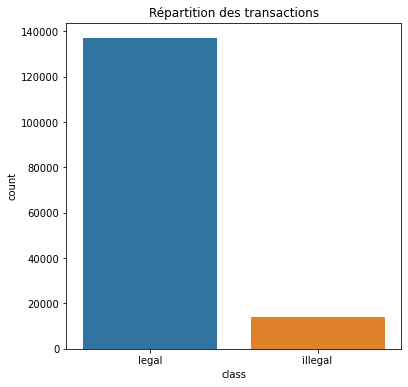

In [42]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=fraud_df, x="class")
plt.title("Répartition des transactions")
ax.set_xticklabels(["legal", "illegal"])
plt.show()

* Notre échantillon est déséquilibré : il y a 9% de transactions frauduleuses.

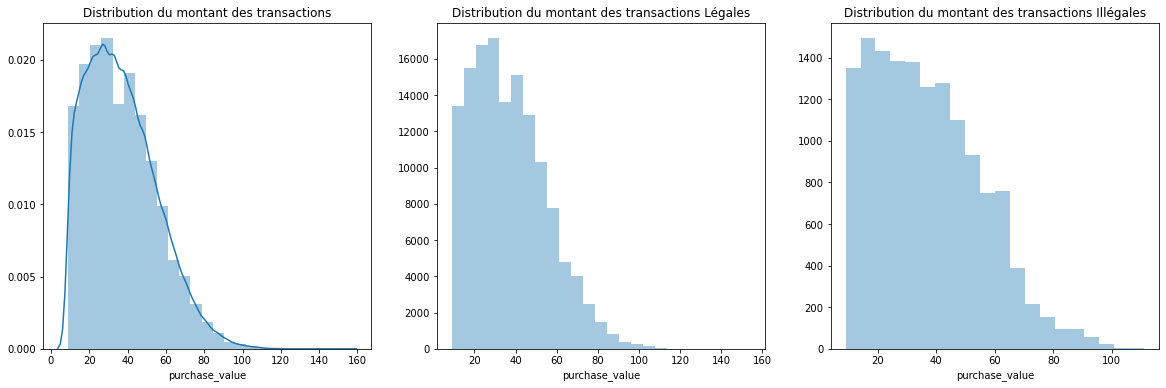

In [43]:
# 'auto', 'fd', *'doane'*,'scott', 'stone', 'rice', *'sturges'*, or 'sqrt'
# np.histogram_bin_edges?
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.distplot(
    fraud_df["purchase_value"], 
    bins='doane',
    kde=True
)
plt.title("Distribution du montant des transactions")
plt.subplot(132)
sns.distplot(
    fraud_df.loc[fraud_df["class"] == 0, "purchase_value"], 
    bins='doane',
    kde=False
)
plt.title("Distribution du montant des transactions Légales")
plt.subplot(133)
sns.distplot(
    fraud_df.loc[fraud_df["class"] == 1, "purchase_value"], 
    bins='doane',
    kde=False
)
plt.title("Distribution du montant des transactions Illégales")
plt.show()

* La distribution du montant des transactions est assez symétrique autour d'une valeur moyenne de 35 euros. Elle est plus étalée à droite,  allant jusqu'à des valeurs supérieures à 100 euros.
* La distribution du montant des transactions légales est presque identique, cela ne nous surprend pas étant donné que la proportion des transactions légales dans notre échantillon est de 91%.
* La distribution du montant des transactions illégales n'est pas symétrique. Une très grande majorité des transactions frauduleuses se fait pour des montants inférieurs à 60 euros. A partir de 40 euros environ, il y a de moins en moins de transactions illégales.

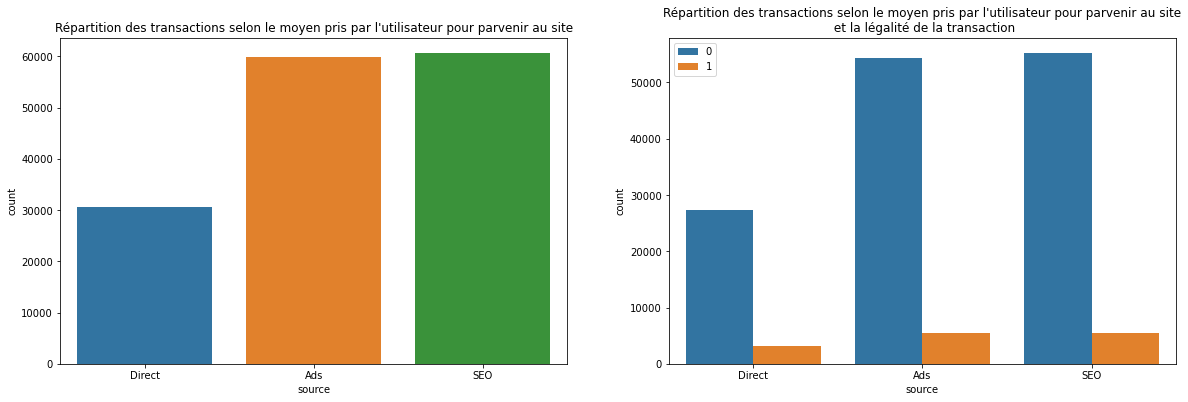

In [44]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data=fraud_df, x="source")
plt.title("Répartition des transactions selon le moyen pris par l'utilisateur pour parvenir au site")
plt.subplot(122)
sns.countplot(data=fraud_df, x="source", hue="class")
plt.title("Répartition des transactions selon le moyen pris par l'utilisateur pour parvenir au site\n et la légalité de la transaction")
plt.legend(loc='upper left')
plt.show()

* Il y a deux fois plus de transactions faites par des utilisateurs accédant au site à partir d'annonces publicitaires et via un moteur de recherche que de transactions réalisées par des utilisateurs ayant tapé directement l'URL du site.
* Nous observons que les proportions de transactions frauduleuses selon le type d'accès au site sont très similaires : il n'y a a-priori pas de moyen d'accès privilégié pour commettre une fraude.

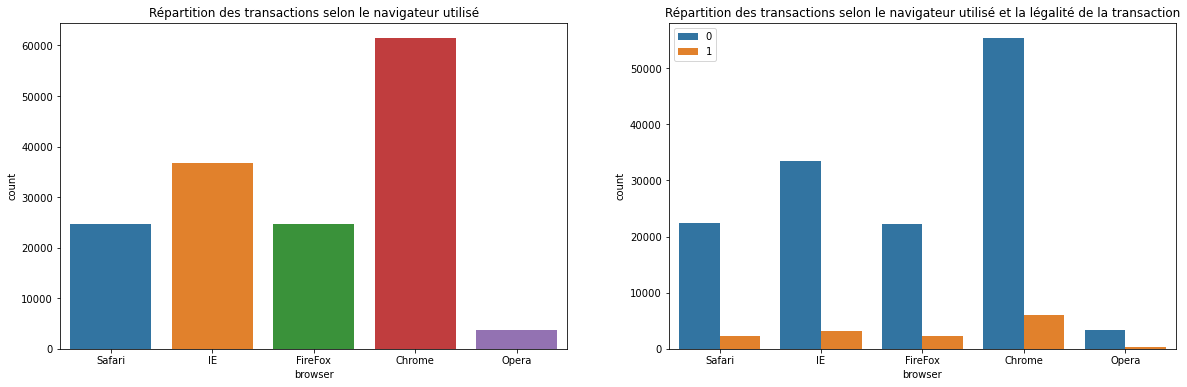

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(121)
sns.countplot(data=fraud_df, x="browser")
plt.title("Répartition des transactions selon le navigateur utilisé")
plt.subplot(122)
sns.countplot(data=fraud_df, x="browser", hue="class")
plt.title("Répartition des transactions selon le navigateur utilisé et la légalité de la transaction")
plt.legend(loc='upper left')
plt.show()

* Les transactions frauduleuses ne se font pas à partir d'un navigateur spécifique : les proportions de transactions illégales selon le navigateur sont très proches des proportions observées dans l'ensemble de l'échantillon.

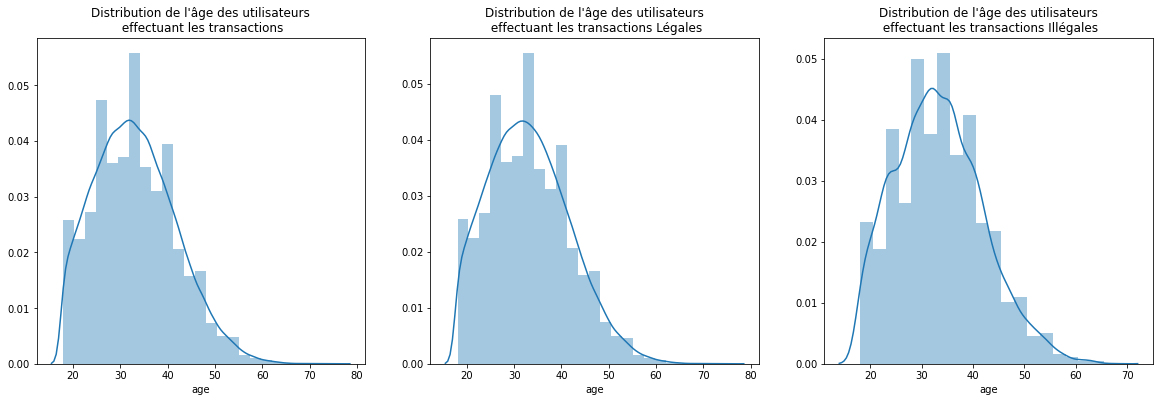

In [46]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.distplot(
    fraud_df["age"], 
    bins='doane',
    kde=True
)
plt.title("Distribution de l'âge des utilisateurs\n effectuant les transactions")
plt.subplot(132)
sns.distplot(
    fraud_df.loc[fraud_df["class"] == 0, "age"], 
    bins='doane',
    kde=True
)
plt.title("Distribution de l'âge des utilisateurs\n effectuant les transactions Légales")
plt.subplot(133)
sns.distplot(
    fraud_df.loc[fraud_df["class"] == 1, "age"], 
    bins='doane',
    kde=True
)
plt.title("Distribution de l'âge des utilisateurs\n effectuant les transactions Illégales")
plt.show()

* Les trois distributions ci-dessus sont similaires, pour ne pas dire identiques : l'âge de l'utilisateur qui effectue la transaction ne suffit pas à déterminer sa nature : légale ou illégale.
* L'âge moyen des utilisateurs réalisant les transactions est de 33 ans.

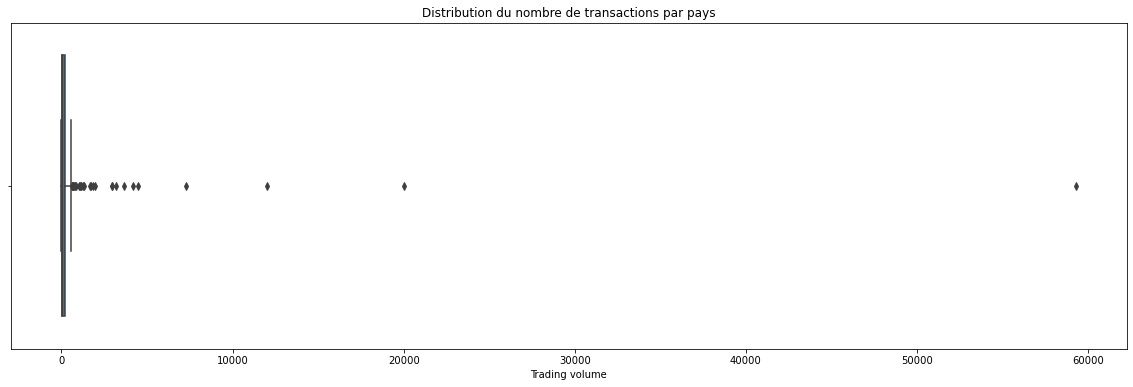

In [47]:
plt.figure(figsize=(20,6))
sns.boxplot(fraud_df["country"].value_counts())
plt.title("Distribution du nombre de transactions par pays")
plt.xlabel("Trading volume")
plt.show()

* Lorsque nous regardons le nombre de transactions effectuées par pays, nous constatons que nombreux sont les pays pour lesquels très peu de transactions furent réalisées, comparativement à la taille de notre échantillon. Dans 75% des pays, nous comptons moins de 250 samples.

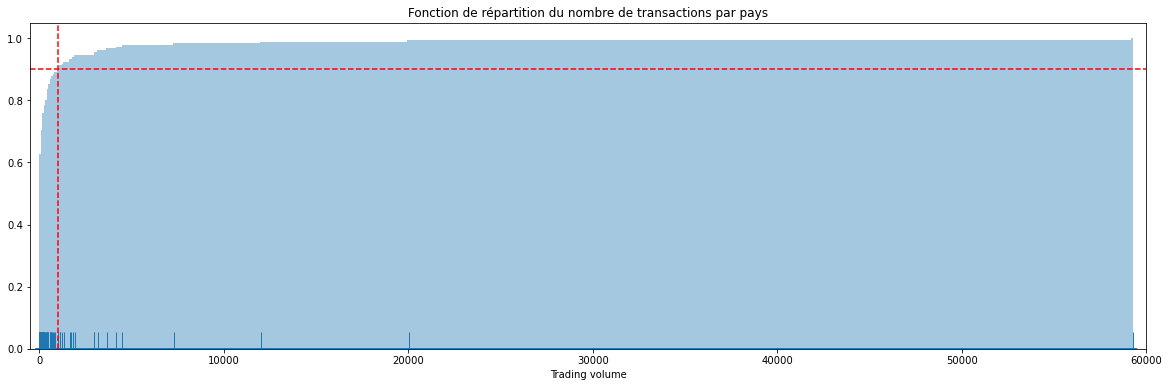

In [48]:
plt.figure(figsize=(20,6))
sns.distplot(
    fraud_df["country"].value_counts(),
    bins='auto',
    rug=True,
    hist_kws={'cumulative': True}
)
plt.xlim([-500, 60000])
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=1000, color='r', linestyle='--')
plt.xlabel("Trading volume")
plt.title("Fonction de répartition du nombre de transactions par pays")
plt.show()

* Nous allons procéder à un regroupement : dans notre échantillon, pour une valeur seuil de 1000 observations (ou transactions), nous retrouvons près de 90% des pays.
* Nous allons donc créer une classe Other dans laquelle seront rassemblés tous les pays pour lesquels nous dénombrons moins de 1000 transactions.

In [49]:
countries_low_trading_volume = fraud_df["country"].value_counts()[fraud_df["country"].value_counts() <= 1000].index
fraud_df.loc[fraud_df["country"].isin(countries_low_trading_volume), "country"] = 'Other'

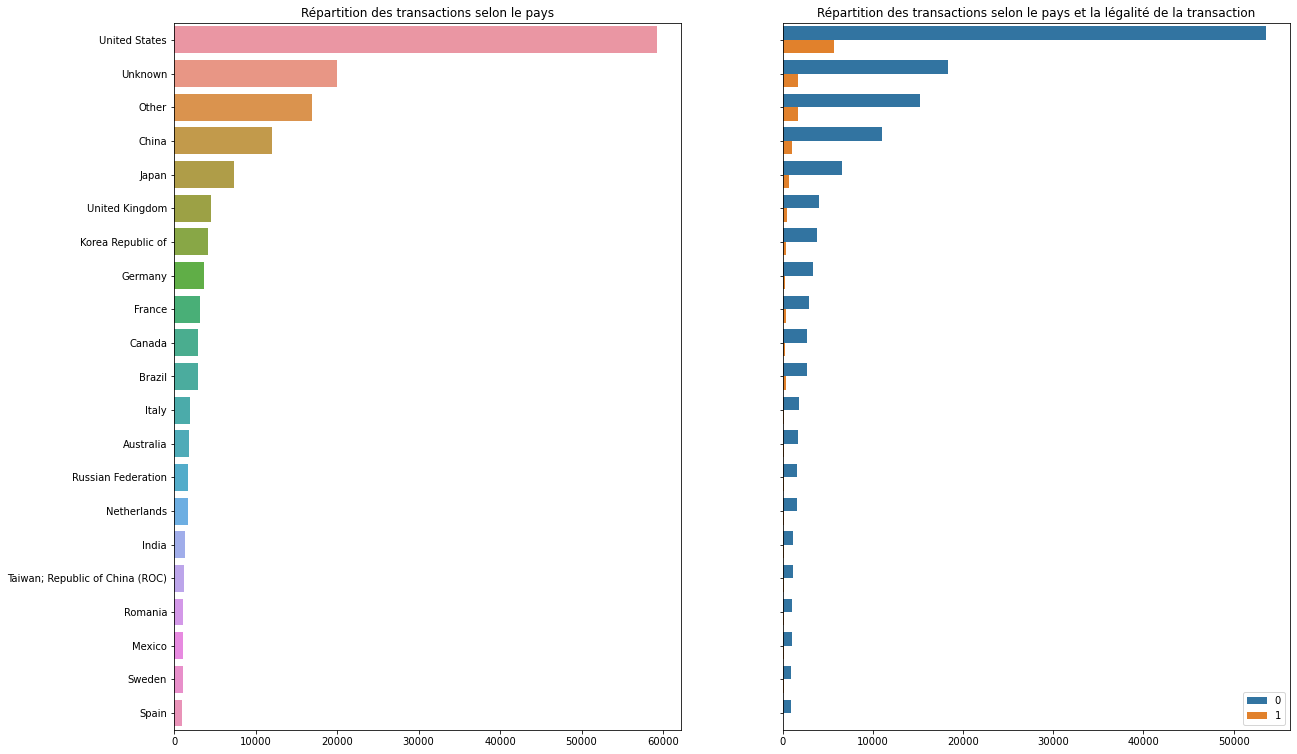

In [50]:
country_count = pd.DataFrame(fraud_df["country"].value_counts())
country_count_per_class = fraud_df.groupby(["country", "class"])["ip_address"].count().reset_index().rename(columns={"ip_address" : "count"})
country_count_per_class = country_count_per_class.sort_values(by=["count"], ascending=False)

plt.figure(figsize=(20,13))
plt.subplot(121)
sns.barplot(data=country_count, y=country_count.index, x="country")
plt.title("Répartition des transactions selon le pays")
plt.xlabel('')
plt.subplot(122)
ax = sns.barplot(data=country_count_per_class, y="country", x="count", hue="class")
plt.title("Répartition des transactions selon le pays et la légalité de la transaction")
plt.legend(loc='lower right')
plt.xlabel('')
plt.ylabel('')
ax.set_yticklabels([])
plt.show()

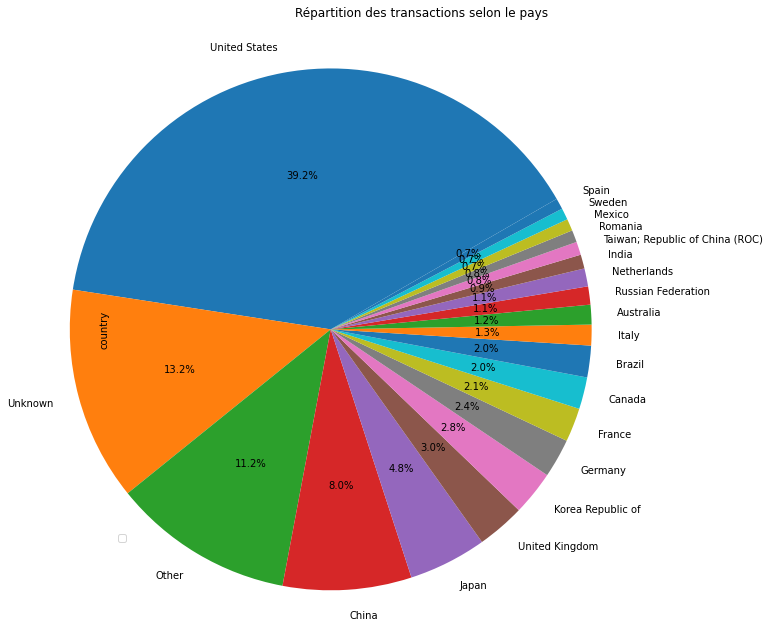

In [51]:
country_count.plot.pie(y="country", figsize=(20,8), radius=1.5, autopct='%1.1f%%', startangle=30)
plt.legend('')
plt.title("Répartition des transactions selon le pays", loc='right', pad=95)
plt.show()

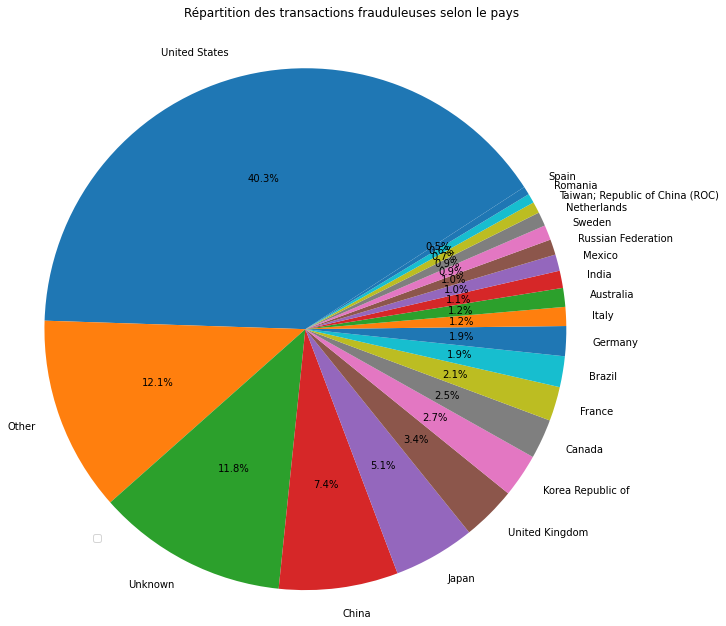

In [52]:
plt.figure(figsize=(20,8))
plt.pie(country_count_per_class.loc[country_count_per_class["class"] == 1, "count"], 
        labels=country_count_per_class.loc[country_count_per_class["class"] == 1,"country"], 
        autopct='%1.1f%%', 
        radius=1.5,
       startangle=33)
plt.legend('')
plt.title("Répartition des transactions frauduleuses selon le pays ", loc='right', pad=95)
plt.show()

* La classe Unknown de la variable country est la deuxième modalité la plus fréquente dans notre échantillon. Autrement dit, les adresses ip dont nous n'avons pas pu identifier la provenance sont nombreuses. Elles ne sont pas pour autant suspicieuses : la proportion de transactions frauduleuses dans ce groupe n'est pas plus important que dans les autres.
* Près de 40% des transactions proviennent des Etats-Unis. Cette proportion se retrouve dans l'ensemble des transactions frauduleuses.

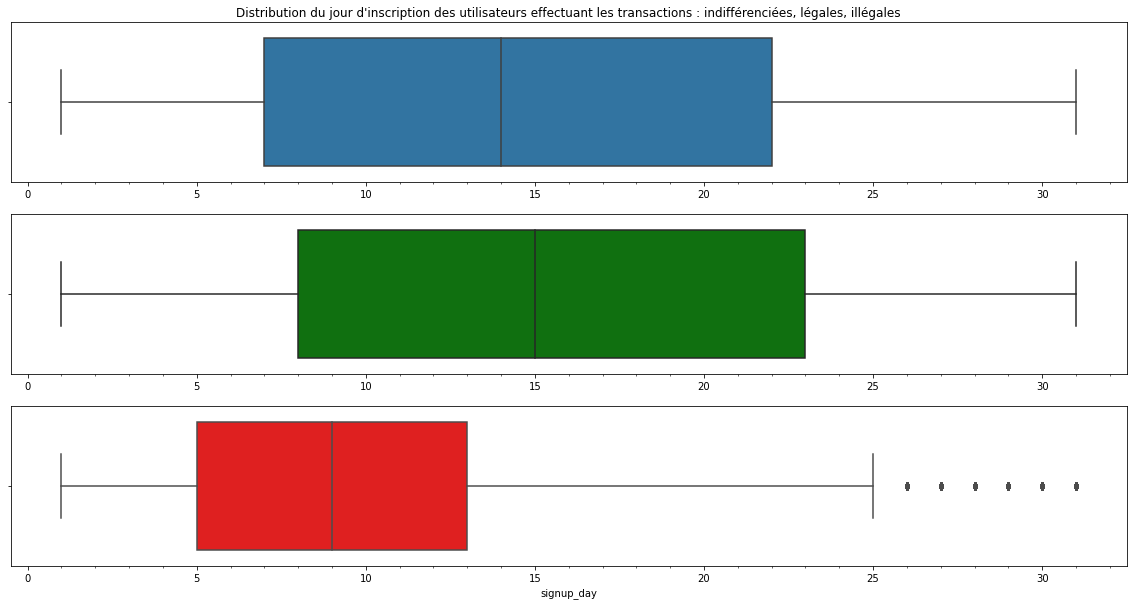

In [53]:
plt.figure(figsize=(20,10))
plt.subplot(311)
sns.boxplot(fraud_df["signup_day"])
plt.title("Distribution du jour d'inscription des utilisateurs effectuant les transactions : indifférenciées, légales, illégales")
plt.xlabel('')
plt.minorticks_on()
plt.subplot(312)
sns.boxplot(fraud_df.loc[fraud_df["class"] == 0, "signup_day"], color='green')
plt.minorticks_on()
plt.xlabel('')
plt.subplot(313)
sns.boxplot(fraud_df.loc[fraud_df["class"] == 1, "signup_day"], color='red')
plt.minorticks_on()
plt.show()

* Pour 50% des transactions illégales, le jour d'inscription du compte est compris entre le 5 et 13 du mois.

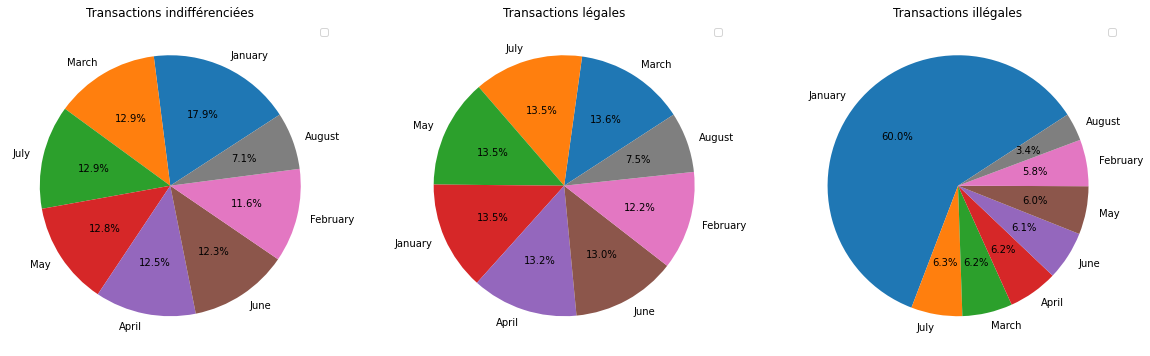

In [54]:
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.pie(fraud_df.loc[:, "signup_month"].value_counts().values, 
        labels=fraud_df.loc[:,"signup_month"].value_counts().index, 
        autopct='%1.1f%%', 
        radius=1,
       startangle=33)
plt.legend('')
plt.title("Transactions indifférenciées")
plt.subplot(132)
plt.pie(fraud_df.loc[fraud_df["class"] == 0, "signup_month"].value_counts().values, 
        labels=fraud_df.loc[fraud_df["class"] == 0,"signup_month"].value_counts().index, 
        autopct='%1.1f%%', 
        radius=1,
       startangle=33)
plt.legend('')
plt.title("Transactions légales")
plt.subplot(133)
plt.pie(fraud_df.loc[fraud_df["class"] == 1, "signup_month"].value_counts().values, 
        labels=fraud_df.loc[fraud_df["class"] == 1,"signup_month"].value_counts().index, 
        autopct='%1.1f%%', 
        radius=1,
       startangle=33)
plt.legend('')
plt.title("Transactions illégales")
plt.show()

* Dans notre échantillons, les inscriptions s'étalent de janvier à août.
* Nous observons moins d'inscriptions durant le mois d'août, ce n'est pas surprenant étant donné que la plupart des individus se trouve en vacances.
* Si nous considèrons l'ensemble des individus, il y a plus d'inscriptions qui se font au mois de janvier que lors des mois suivants (hormis le mois d'août). En revanche, 60% des transactions illégales se sont faits à partir d'un compte créé en janvier. Les autres mois de création de compte se partagent le reste des transactions frauduleuses de façon équirépartie (environ 6%)

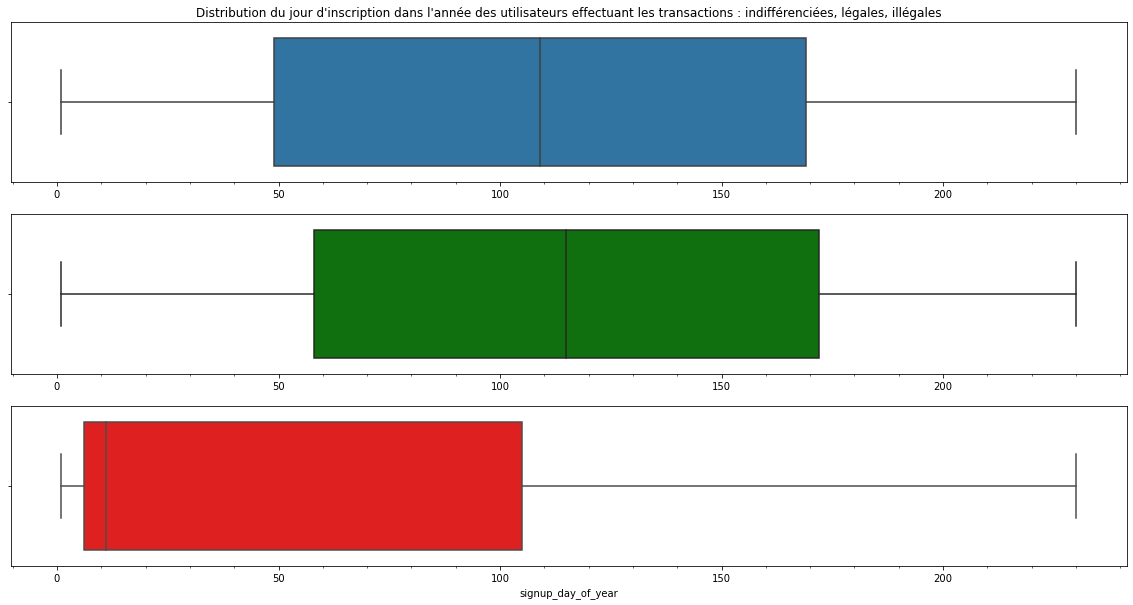

In [55]:
plt.figure(figsize=(20,10))
plt.subplot(311)
sns.boxplot(fraud_df["signup_day_of_year"])
plt.title("Distribution du jour d'inscription dans l'année des utilisateurs effectuant les transactions : indifférenciées, légales, illégales")
plt.xlabel('')
plt.minorticks_on()
plt.subplot(312)
sns.boxplot(fraud_df.loc[fraud_df["class"] == 0, "signup_day_of_year"], color='green')
plt.minorticks_on()
plt.xlabel('')
plt.subplot(313)
sns.boxplot(fraud_df.loc[fraud_df["class"] == 1, "signup_day_of_year"], color='red')
plt.minorticks_on()
plt.show()

* La distribution du jour de création de compte dans l'année (entre 1 et 230) pour l'ensemble des transactions frauduleuses est très concentrée à gauche, pour des valeurs inférieures : 75% des comptes de transactions illégales furent créés avant le 105è jour, i.e. avant la mi-avril.
* 50% des créations de compte réalisant des transactions illégales se sont faits avant le 11è jour, soit dans les deux premières semaines de janvier.
* En considérant le groupe des transactions frauduleuses, 50% des comptes furent enregistrés entre le 6è jour et 105è jour, soit entre la deuxième semaine de janvier et la mi-avril.

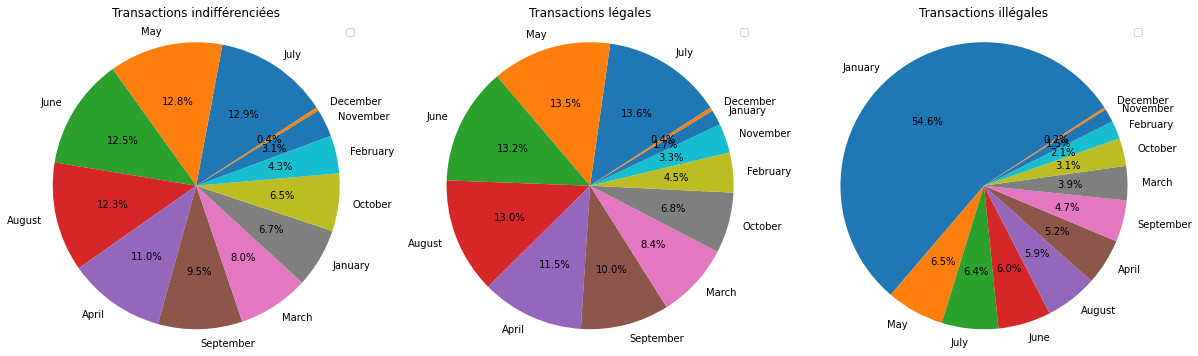

In [56]:
plt.figure(figsize=(20,6))

plt.subplot(131)
plt.pie(fraud_df.loc[:, "purchase_month"].value_counts().values, 
        labels=fraud_df.loc[:,"purchase_month"].value_counts().index, 
        autopct='%1.1f%%', 
        radius=1.1,
       startangle=33)
plt.legend('')
plt.title("Transactions indifférenciées")
plt.subplot(132)
plt.pie(fraud_df.loc[fraud_df["class"] == 0, "purchase_month"].value_counts().values, 
        labels=fraud_df.loc[fraud_df["class"] == 0,"purchase_month"].value_counts().index, 
        autopct='%1.1f%%', 
        radius=1.1,
       startangle=33)
plt.legend('')
plt.title("Transactions légales")
plt.subplot(133)
plt.pie(fraud_df.loc[fraud_df["class"] == 1, "purchase_month"].value_counts().values, 
        labels=fraud_df.loc[fraud_df["class"] == 1,"purchase_month"].value_counts().index, 
        autopct='%1.1f%%', 
        radius=1.1,
       startangle=33)
plt.legend('')
plt.title("Transactions illégales")
plt.show()

* Dans notre échantillons, les achats s'étalent de janvier à décembre.
* Il est possible d'effectuer un découpage en quatre des mois d'achat:
    - de janvier à mars, avec un taux moyen de 6.3% des achats 
    - d'avril à août, en moyenne 12.3% des transactions se sont faits chaque mois
    - septembre, 9.5% des achats 
    - d'octobre à décembre, 3.3% des transactions furent réalisées en moyenne chaque mois
* 54.6% des achats illégaux se sont faits lors du mois de janvier. Puis, le nombre de transactions frauduleuses baisse drastiquement le mois suivant (2.1% des transactions). Par la suite, le nombre de fraudes augmente progressivement jusqu'à atteindre un pic au mois de mai (6.5% des transactions) avant de décroître pour atteindre son niveau le plus bas en décembre.

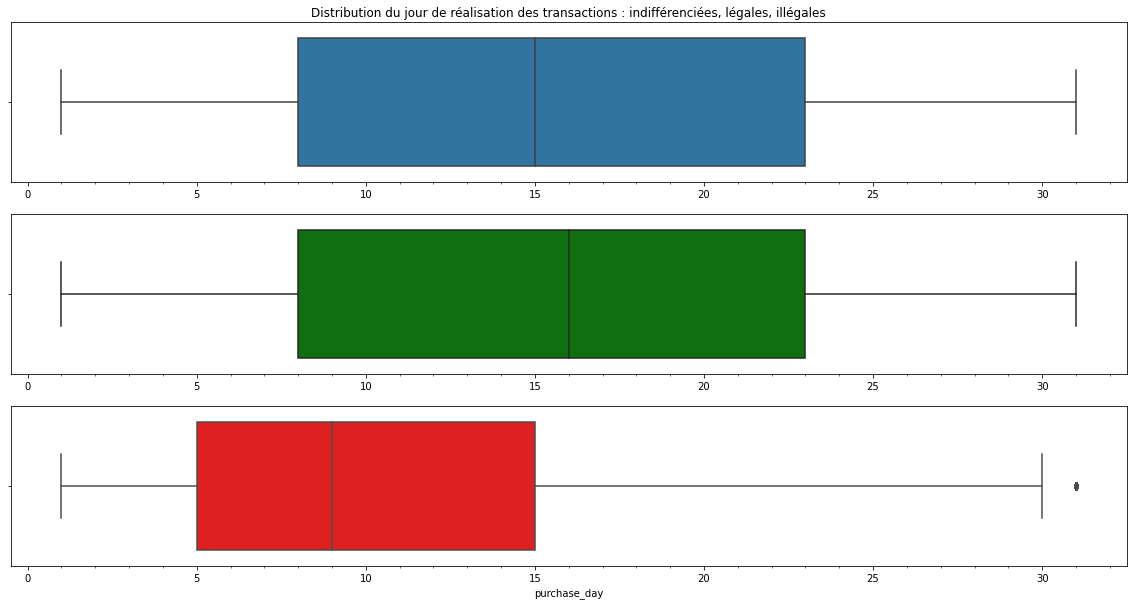

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(311)
sns.boxplot(fraud_df["purchase_day"])
plt.title("Distribution du jour de réalisation des transactions : indifférenciées, légales, illégales")
plt.xlabel('')
plt.minorticks_on()
plt.subplot(312)
sns.boxplot(fraud_df.loc[fraud_df["class"] == 0, "purchase_day"], color='green')
plt.minorticks_on()
plt.xlabel('')
plt.subplot(313)
sns.boxplot(fraud_df.loc[fraud_df["class"] == 1, "purchase_day"], color='red')
plt.minorticks_on()
plt.show()

* 75% des transactions frauduleuses se sont faits avant le 15 du mois.
* 50 % des achats illégaux furent effectués avant le 9 du mois.

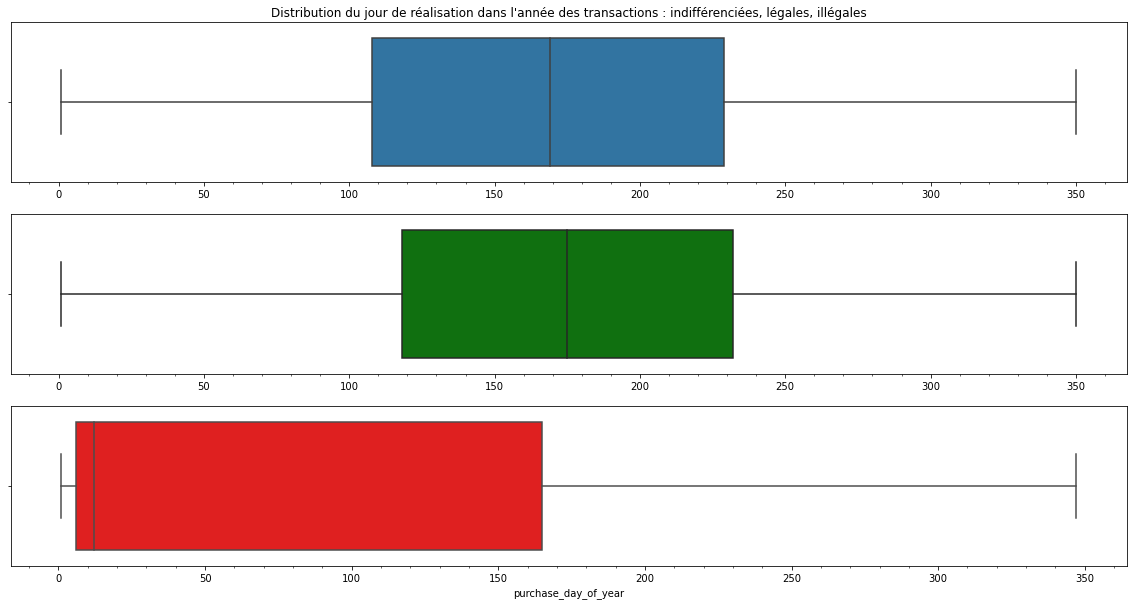

In [59]:
plt.figure(figsize=(20,10))
plt.subplot(311)
sns.boxplot(fraud_df["purchase_day_of_year"])
plt.title("Distribution du jour de réalisation dans l'année des transactions : indifférenciées, légales, illégales")
plt.xlabel('')
plt.minorticks_on()
plt.subplot(312)
sns.boxplot(fraud_df.loc[fraud_df["class"] == 0, "purchase_day_of_year"], color='green')
plt.minorticks_on()
plt.xlabel('')
plt.subplot(313)
sns.boxplot(fraud_df.loc[fraud_df["class"] == 1, "purchase_day_of_year"], color='red')
plt.minorticks_on()
plt.show()

* La distribution du jour de réalisation de l'achat au cours de  l'année (entre 1 et 350) pour l'ensemble des transactions frauduleuses est très concentrée à gauche, pour des valeurs inférieures : 75% des transactions illégales furent enregistrées avant le 165è jour, i.e. avant la mi-juin.
* 50% des transactions illégales se sont faits avant le 12è jour, soit dans les deux premières semaines de janvier.
* 50% des transactions frauduleuses furent réalisées entre le 6è jour et 165è jour, soit entre la deuxième semaine de janvier et la mi-juin.

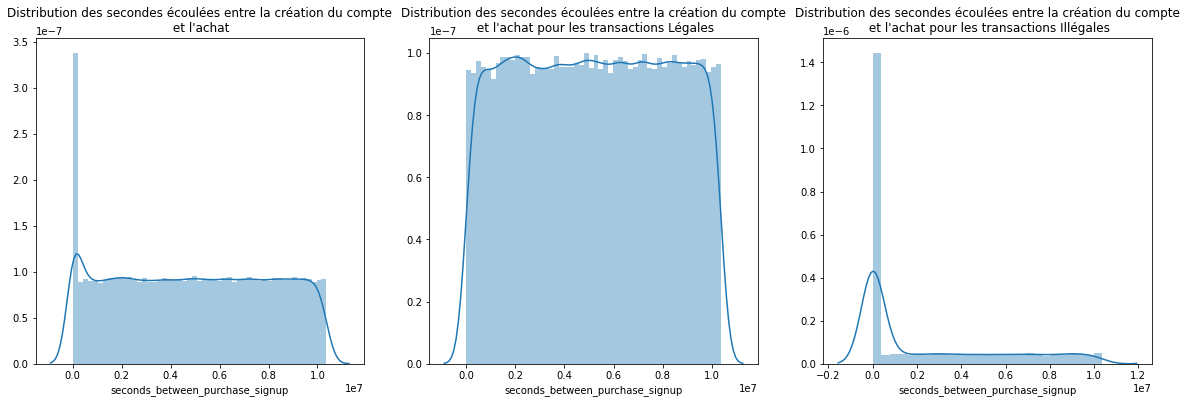

In [60]:
plt.figure(figsize=(20,6))
plt.subplot(131)
sns.distplot(
    fraud_df["seconds_between_purchase_signup"], 
    bins='auto',
    kde=True
)
plt.title("Distribution des secondes écoulées entre la création du compte\n et l'achat")
plt.subplot(132)
sns.distplot(
    fraud_df.loc[fraud_df["class"] == 0, "seconds_between_purchase_signup"], 
    bins='auto',
    kde=True
)
plt.title("Distribution des secondes écoulées entre la création du compte\n et l'achat pour les transactions Légales")
plt.subplot(133)
sns.distplot(
    fraud_df.loc[fraud_df["class"] == 1, "seconds_between_purchase_signup"], 
    bins='auto',
    kde=True
)
plt.title("Distribution des secondes écoulées entre la création du compte\n et l'achat pour les transactions Illégales")
plt.show()

* La distribution pour l'ensemble des transactions légales est assez uniforme : il y a presque autant de transactions qui se font quelques secondes après la création du compte que de transactions se réalisant plusieurs mois après s'être inscrit.
* La distribution pour l'ensemble des transactions illégales est très concentrée à gauche, pour des valeurs proches de 0. Une proportion considérable des achats frauduleux furent effectués peu de temps après la création du compte de l'utilisateur.

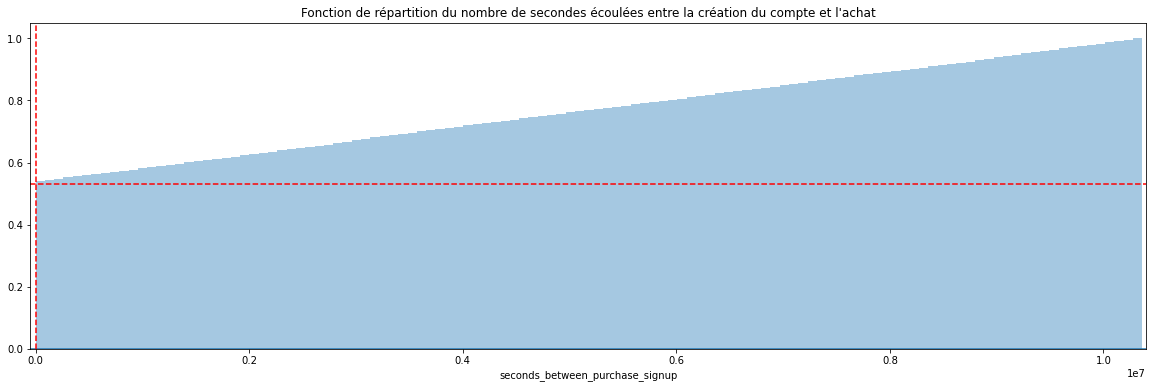

In [61]:
plt.figure(figsize=(20,6))
sns.distplot(
    fraud_df.loc[fraud_df["class"] == 1, "seconds_between_purchase_signup"],
    bins='sqrt',
    hist_kws={'cumulative': True}
)
plt.xlim([-50000, 10400000])
plt.axhline(y=0.53, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel("seconds_between_purchase_signup")
plt.title("Fonction de répartition du nombre de secondes écoulées entre la création du compte et l'achat")
plt.show()

* 53% des transactions frauduleuses se sont produits moins de 1 seconde après la création du compte.
* Pour des périodes supérieures à ce seuil, le nombre de transactions illégales est constant au cours du temps.

# Machine Learning

* Pour la suite de l'analyse, nous allons appeler la classe 0 (transactions légales) de la variable _class_ la classe négative, et la classe 1 (transactions illégales) sera désignée comme la classe positive.

In [62]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151112 entries, 0 to 151111
Data columns (total 27 columns):
signup_time                        151112 non-null datetime64[ns]
purchase_time                      151112 non-null datetime64[ns]
purchase_value                     151112 non-null int64
source                             151112 non-null object
browser                            151112 non-null object
sex                                151112 non-null object
age                                151112 non-null int64
ip_address                         151112 non-null float64
class                              151112 non-null int64
country                            151112 non-null object
signup_month                       151112 non-null object
signup_day                         151112 non-null int64
signup_week_of_year                151112 non-null int64
signup_day_of_week                 151112 non-null object
signup_day_of_year                 151112 non-null int64
signup_h

In [63]:
y = fraud_df["class"]
X = fraud_df.drop(["signup_time", "purchase_time", "ip_address", "class", ], axis=1)

In [64]:
X.head()

,purchase_value,source,browser,sex,age,country,signup_month,signup_day,signup_week_of_year,signup_day_of_week,signup_day_of_year,signup_hour,signup_minute,signup_second,purchase_month,purchase_day,purchase_week_of_year,purchase_day_of_week,purchase_day_of_year,purchase_hour,purchase_minute,purchase_second,seconds_between_purchase_signup
0,46,Direct,Safari,M,36,Unknown,February,16,7,Monday,47,0,17,5,March,8,10,Sunday,67,10,0,39,1763014.000000
1,33,Ads,IE,F,30,Unknown,March,8,10,Sunday,67,4,3,22,March,20,11,Friday,79,17,23,45,1084823.000000
2,33,Direct,FireFox,F,32,Unknown,May,17,20,Sunday,137,16,45,54,May,26,21,Tuesday,146,8,54,34,749320.000000
3,33,Ads,IE,M,40,Unknown,March,3,9,Tuesday,62,19,58,39,May,28,21,Thursday,148,21,9,13,7434634.000000
4,55,Ads,Safari,M,38,Unknown,March,20,11,Friday,79,0,31,27,April,5,14,Sunday,95,7,31,46,1407619.000000


In [65]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

## Preprocessing

### Dummyfication

* Les variables catégorielles __source__, __browser__, __sex__, __country__, __signup_day_of_week__, __signup_month__, __purchase_day_of_week__, __purchase_month__, sont dummyfiées.

In [66]:
X_dummyfied = pd.get_dummies(X, drop_first=True)

In [67]:
X_dummyfied.head()

,purchase_value,age,signup_day,signup_week_of_year,signup_day_of_year,signup_hour,signup_minute,signup_second,purchase_day,purchase_week_of_year,purchase_day_of_year,purchase_hour,purchase_minute,purchase_second,seconds_between_purchase_signup,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,country_Brazil,country_Canada,country_China,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Korea Republic of,country_Mexico,country_Netherlands,country_Other,country_Romania,country_Russian Federation,country_Spain,country_Sweden,country_Taiwan; Republic of China (ROC),country_United Kingdom,country_United States,country_Unknown,signup_month_August,signup_month_February,signup_month_January,signup_month_July,signup_month_June,signup_month_March,signup_month_May,signup_day_of_week_Monday,signup_day_of_week_Saturday,signup_day_of_week_Sunday,signup_day_of_week_Thursday,signup_day_of_week_Tuesday,signup_day_of_week_Wednesday,purchase_month_August,purchase_month_December,purchase_month_February,purchase_month_January,purchase_month_July,purchase_month_June,purchase_month_March,purchase_month_May,purchase_month_November,purchase_month_October,purchase_month_September,purchase_day_of_week_Monday,purchase_day_of_week_Saturday,purchase_day_of_week_Sunday,purchase_day_of_week_Thursday,purchase_day_of_week_Tuesday,purchase_day_of_week_Wednesday
0,46,36,16,7,47,0,17,5,8,10,67,10,0,39,1763014.000000,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,33,30,8,10,67,4,3,22,20,11,79,17,23,45,1084823.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,33,32,17,20,137,16,45,54,26,21,146,8,54,34,749320.000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,33,40,3,9,62,19,58,39,28,21,148,21,9,13,7434634.000000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,55,38,20,11,79,0,31,27,5,14,95,7,31,46,1407619.000000,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


* Nous séparons nos données en données d'apprentissage et données de test avant de normaliser les variables quantitatives.

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dummyfied, y, test_size=0.3, stratify=y, random_state=42)

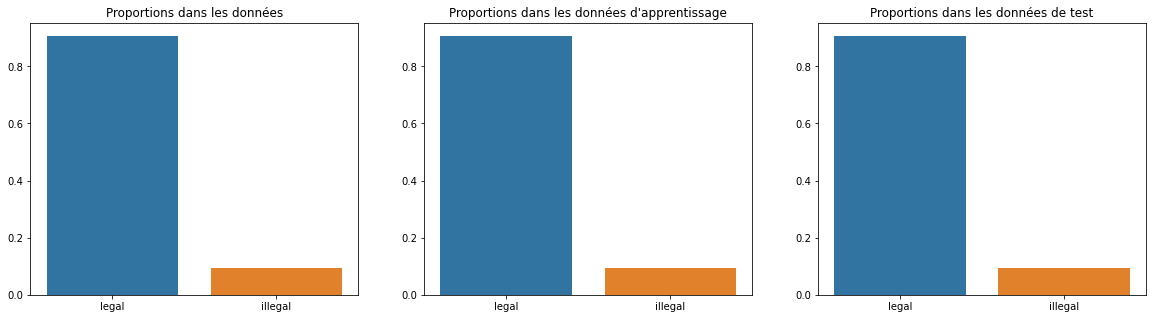

In [69]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.barplot(y=y.value_counts(normalize=True), x=["legal", "illegal"])
plt.title("Proportions dans les données")
plt.ylabel('')
plt.subplot(132)
sns.barplot(y=y_train.value_counts(normalize=True), x=["legal", "illegal"])
plt.title("Proportions dans les données d'apprentissage")
plt.ylabel('')
plt.subplot(133)
sns.barplot(y=y_test.value_counts(normalize=True), x=["legal", "illegal"])
plt.title("Proportions dans les données de test")
plt.ylabel('')
plt.show()

### Normalisation

In [70]:
numerical_features=[]

for col in X_dummyfied.columns:
    if X_dummyfied[col].dtype in ['int64', 'float64']:
        numerical_features.append(col)
numerical_features.sort()

In [71]:
from sklearn.preprocessing import StandardScaler

fraud_scaler = StandardScaler()

features_train_scaled = fraud_scaler.fit_transform(X_train.loc[:, numerical_features])

In [72]:
for ind, col in enumerate(numerical_features):
    X_train[col] = features_train_scaled[:,ind]

In [73]:
X_train.head()

,purchase_value,age,signup_day,signup_week_of_year,signup_day_of_year,signup_hour,signup_minute,signup_second,purchase_day,purchase_week_of_year,purchase_day_of_year,purchase_hour,purchase_minute,purchase_second,seconds_between_purchase_signup,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,country_Brazil,country_Canada,country_China,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Korea Republic of,country_Mexico,country_Netherlands,country_Other,country_Romania,country_Russian Federation,country_Spain,country_Sweden,country_Taiwan; Republic of China (ROC),country_United Kingdom,country_United States,country_Unknown,signup_month_August,signup_month_February,signup_month_January,signup_month_July,signup_month_June,signup_month_March,signup_month_May,signup_day_of_week_Monday,signup_day_of_week_Saturday,signup_day_of_week_Sunday,signup_day_of_week_Thursday,signup_day_of_week_Tuesday,signup_day_of_week_Wednesday,purchase_month_August,purchase_month_December,purchase_month_February,purchase_month_January,purchase_month_July,purchase_month_June,purchase_month_March,purchase_month_May,purchase_month_November,purchase_month_October,purchase_month_September,purchase_day_of_week_Monday,purchase_day_of_week_Saturday,purchase_day_of_week_Sunday,purchase_day_of_week_Thursday,purchase_day_of_week_Tuesday,purchase_day_of_week_Wednesday
61044,0.057859,-0.135467,0.034620,-0.472662,-0.516815,-0.213522,-1.235719,-0.548538,0.307428,-0.753389,-0.716875,-0.511271,1.244152,-1.355143,-0.638793,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
141894,0.986807,0.096752,-1.113389,0.647882,0.677590,-1.513890,0.786262,1.303101,0.307428,0.790163,0.778326,0.356247,-0.891037,-0.951094,0.484794,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
84552,-1.472173,1.141742,0.953027,-0.370794,-0.400288,0.219934,0.844033,-1.185039,0.988122,-1.010648,-1.023268,-1.089616,0.551658,-0.835652,-1.561616,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
116037,0.112503,0.561192,1.412230,-0.370794,-0.342024,-0.791463,0.555178,-0.722129,0.647775,-0.667636,-0.680108,1.079178,-0.371667,0.722823,-0.871834,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
61838,-1.308241,-0.019358,0.838226,-0.370794,-0.414854,1.520301,-0.889093,-0.317083,1.555367,0.189893,0.165538,-1.378789,-0.025420,-0.777931,1.139870,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [74]:
features_test_scaled = fraud_scaler.transform(X_test.loc[:, numerical_features])
for ind, col in enumerate(numerical_features):
    X_test[col] = features_test_scaled[:,ind]

In [75]:
X_test.head()

,purchase_value,age,signup_day,signup_week_of_year,signup_day_of_year,signup_hour,signup_minute,signup_second,purchase_day,purchase_week_of_year,purchase_day_of_year,purchase_hour,purchase_minute,purchase_second,seconds_between_purchase_signup,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M,country_Brazil,country_Canada,country_China,country_France,country_Germany,country_India,country_Italy,country_Japan,country_Korea Republic of,country_Mexico,country_Netherlands,country_Other,country_Romania,country_Russian Federation,country_Spain,country_Sweden,country_Taiwan; Republic of China (ROC),country_United Kingdom,country_United States,country_Unknown,signup_month_August,signup_month_February,signup_month_January,signup_month_July,signup_month_June,signup_month_March,signup_month_May,signup_day_of_week_Monday,signup_day_of_week_Saturday,signup_day_of_week_Sunday,signup_day_of_week_Thursday,signup_day_of_week_Tuesday,signup_day_of_week_Wednesday,purchase_month_August,purchase_month_December,purchase_month_February,purchase_month_January,purchase_month_July,purchase_month_June,purchase_month_March,purchase_month_May,purchase_month_November,purchase_month_October,purchase_month_September,purchase_day_of_week_Monday,purchase_day_of_week_Saturday,purchase_day_of_week_Sunday,purchase_day_of_week_Thursday,purchase_day_of_week_Tuesday,purchase_day_of_week_Wednesday
106037,-0.433937,0.096752,0.608624,1.360955,1.333056,1.520301,1.652825,-0.432810,-1.167409,1.390434,1.366601,-1.523375,0.551658,1.069151,0.528853,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
106584,0.440367,-0.599907,-0.194982,0.342279,0.342574,1.231331,1.190658,-0.432810,1.441918,0.875916,0.900883,0.500833,0.782489,1.357757,1.378301,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15848,0.549655,0.328972,-0.654185,1.157220,1.172831,-0.069037,1.017345,0.955919,1.328469,0.875916,0.888627,0.934592,0.147703,1.011429,-0.214142,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
129067,-0.106073,1.373962,1.641832,0.138544,0.138651,-1.369404,-0.889093,-1.590085,-1.394307,-0.496130,-0.533039,1.512937,-1.525823,-0.200718,-1.445190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
131963,-1.253597,0.677302,-0.539384,-0.574529,-0.589645,0.508904,1.248429,0.608736,-0.259817,-0.067366,-0.030553,0.067074,-0.717914,0.376495,1.047776,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


## Régression logistique

In [76]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [77]:
print("Logistic Regression score on training set :", log_reg.score(X_train, y_train))
print("Logistic Regression score on testing set :", log_reg.score(X_test, y_test))

Logistic Regression score on training set : 0.942228062546087
Logistic Regression score on testing set : 0.9412582167909296


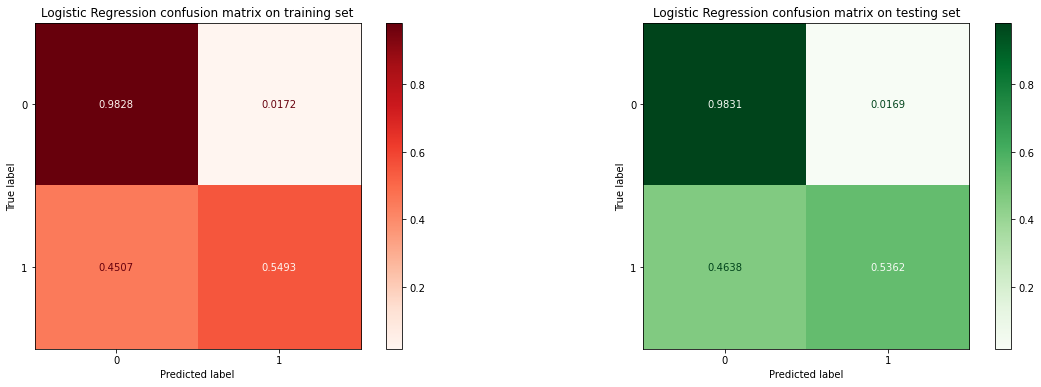

In [78]:
from sklearn.metrics import plot_confusion_matrix

fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(log_reg, X_train, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Logistic Regression confusion matrix on training set")
plot_confusion_matrix(log_reg, X_test, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Logistic Regression confusion matrix on testing set")
plt.show()

* Sur les données d'apprentissage, notre modèle de régression logistique reconnaît plus de 95% des individus de la classe négative (classe 0) et près de 55% de la classe positive (classe 1).
* Sur les données de test, le modèle prédit la bonne classe d'appartenance pour plus de 95% des individus de la classe négative et près de 54% des utilisateurs de la classe positive.

In [79]:
from sklearn.metrics import classification_report

print("Logistic Regression : classification metrics on training set")
print(classification_report(y_train, log_reg.predict(X_train)))
print()
print("Logistic Regression : classification metrics on testing set")
print(classification_report(y_test, log_reg.predict(X_test)))

Logistic Regression : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     95872
           1       0.77      0.55      0.64      9906

    accuracy                           0.94    105778
   macro avg       0.86      0.77      0.80    105778
weighted avg       0.94      0.94      0.94    105778


Logistic Regression : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     41089
           1       0.77      0.54      0.63      4245

    accuracy                           0.94     45334
   macro avg       0.86      0.76      0.80     45334
weighted avg       0.94      0.94      0.94     45334



* Le f1-score de la classe positive est de 0.64 pour les données d'apprentissage et de 0.63 pour les données de test.
* Plus précisément, sur nos données de test, le modèle effectue un peu moins de 80% de prédictions correctes sur la classe positive, et sur tous les individus de la classe positive, il parvient à en reconnaître un peu plus de 50%.

In [80]:
log_reg_coef_ranking = pd.DataFrame(
    data=log_reg.coef_.reshape(-1, 1),
    index=X_train.columns, 
    columns=["Coefficient"])
log_reg_coef_ranking

,Coefficient
purchase_value,0.018137
age,0.004108
signup_day,-0.121811
signup_week_of_year,-0.017672
signup_day_of_year,-0.023276
...,...
purchase_day_of_week_Saturday,-0.009297
purchase_day_of_week_Sunday,0.084501
purchase_day_of_week_Thursday,0.017341
purchase_day_of_week_Tuesday,-0.010960


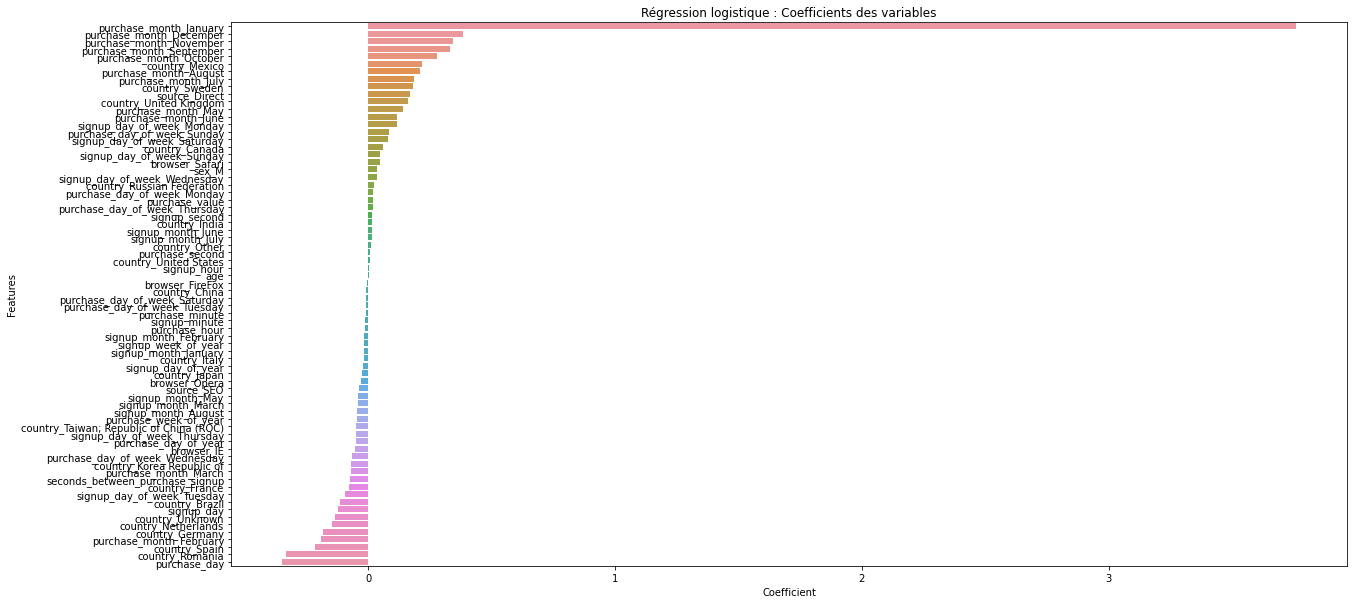

In [81]:
log_reg_coef_ranking = log_reg_coef_ranking.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(data=log_reg_coef_ranking, x="Coefficient", y=log_reg_coef_ranking.index)
plt.ylabel("Features")
plt.title("Régression logistique : Coefficients des variables")
plt.show()

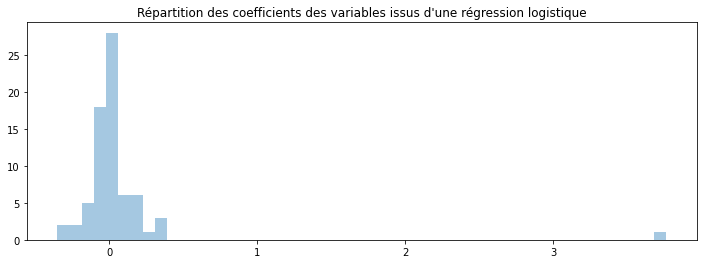

In [82]:
plt.figure(figsize=(12, 4))
sns.distplot(log_reg_coef_ranking, kde=False)
plt.title("Répartition des coefficients des variables issus d'une régression logistique")
plt.show()

* Comme pressenti dans la partie DataViz, le coefficient le plus élevé est celui du feature indiquant si l'achat s'est produit au mois de janvier.
* En revanche, les autres coefficients sont très proches de 0, ce qui signifie que les variables correspondantes ont un faible impact sur l'évaluation de la probabilité qu'une transaction soit frauduleuse.
* Il s'agira de retirer certaines variables pour ne garder que les features les plus influents.

## Sélection des variables

* Effectuons des tests statistiques univariées pour voir quels sont nos meilleurs features. 

In [100]:
from sklearn.feature_selection import chi2

chi2_score, p_value = chi2(X_dummyfied, y)
chi2_score, p_value = chi2_score.reshape(-1, 1), p_value.reshape(-1, 1)

feature_selection = pd.DataFrame(
    data=np.concatenate([chi2_score, p_value], axis=1), 
    index=X_dummyfied.columns, 
    columns=["Chi2 Score", "P-value"])
feature_selection.sort_values(by="P-value", ascending=False)

,Chi2 Score,P-value
country_France,0.051109,0.821144
country_Brazil,0.211179,0.645845
country_Korea Republic of,0.269309,0.603796
browser_FireFox,0.668842,0.413456
browser_Opera,0.845493,0.357831
...,...,...
seconds_between_purchase_signup,19915137660.007359,0.000000
purchase_week_of_year,90000.766191,0.000000
signup_day,18988.031944,0.000000
purchase_day,19748.794857,0.000000


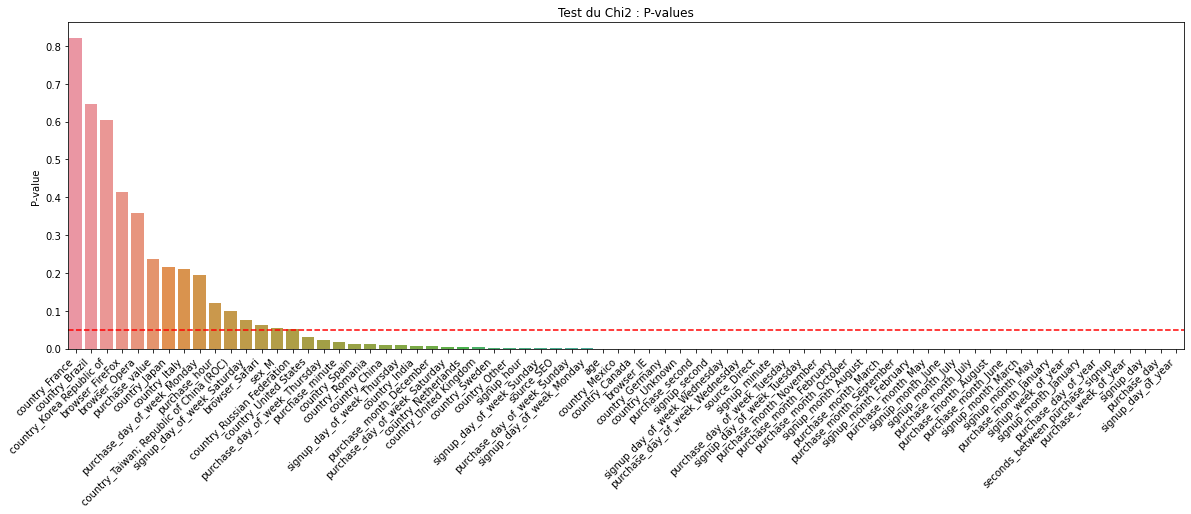

In [101]:
feature_selection = feature_selection.sort_values(by="P-value", ascending=False)

plt.figure(figsize=(20,6))
ax = sns.barplot(data=feature_selection, y="P-value", x=feature_selection.index)
ax.set_xticklabels(feature_selection.index, rotation=45, ha="right")
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title("Test du Chi2 : P-values")
plt.show()

* Nous allons retirer les features dont la p-value est supérieure ou égale au risque standard de 5%. Les autres variables sont significatives.

In [102]:
feature_selection = feature_selection[feature_selection["P-value"] < 0.05]
feature_selection = feature_selection.sort_values(by="Chi2 Score", ascending=False)

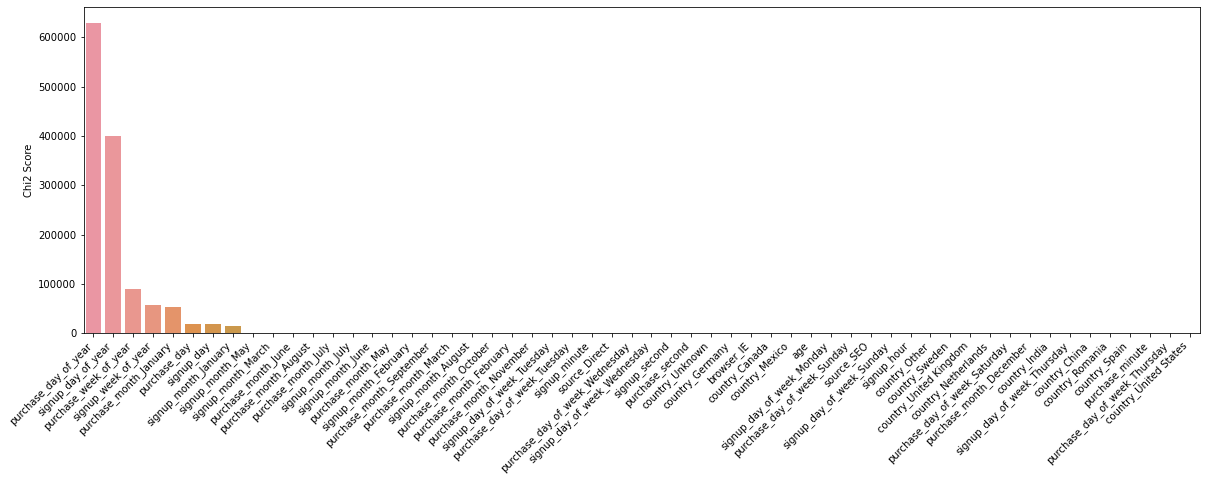

In [103]:
plt.figure(figsize=(20,6))
ax = sns.barplot(data=feature_selection.iloc[1:,:], y="Chi2 Score", x=feature_selection.iloc[1:,:].index)
ax.set_xticklabels(feature_selection.iloc[1:,:].index, rotation=45, ha="right")
plt.show()

* D'après le test du Chi2, la variable __seconds_between_purchase_signup__ est de loin la variable la plus significative avec un score très élevé (19915137660.007359). Pour rappel, elle indique pour chaque sample le nombre de secondes écoulées entre la date d'inscription et la date d'achat.
* A un tout autre ordre de grandeur, les features les plus significatifs sont les suivants : 
    - __purchase_day_of_year__, jour dans l'année durant lequel s'est effectuée la transaction
    - __signup_day_of_year__, jour dans l'année au cours duquel l'utilisateur réalisant la transaction s'est inscrit ; pour chaque observation, la valeur enregistrée est inférieure ou égale à la valeur indiquée pour __purchase_day_of_year__
    - __purchase_week_of_year__, semaine dans l'année où s'est fait la transaction
    - __signup_week_of_year__, semaine dans l'année où l'internaute effectuant la transaction a créé son compte sur le site
    - __purchase_month_January__, variable binaire, 1 si la transaction fut enregistrée en janvier, 0 sinon
    - __purchase_day__, jour dans le mois au cours duquel l'utilisateur a procédé à l'achat
    - __signup_day__, jour dans le mois durant lequel la création du compte eut lieu
    - __signup_month_January__, variable binaire, 1 si la création du compte fut réalisée au mois de janvier, 0 sinon

## Régression logistique

### Variables les plus significatives

* Nous allons relancer une régression logistique avec les variables les plus significatives selon le test du Chi2 effectué juste avant.

In [104]:
X_train_simplified = X_train[["seconds_between_purchase_signup", "purchase_day_of_year", "signup_day_of_year", 
                              "purchase_week_of_year", "signup_week_of_year", "purchase_month_January", "purchase_day",
                             "signup_day", "signup_month_January"]]

In [105]:
X_train_simplified.head()

,seconds_between_purchase_signup,purchase_day_of_year,signup_day_of_year,purchase_week_of_year,signup_week_of_year,purchase_month_January,purchase_day,signup_day,signup_month_January
61044,-0.638793,-0.716875,-0.516815,-0.753389,-0.472662,0,0.307428,0.034620,0
141894,0.484794,0.778326,0.677590,0.790163,0.647882,0,0.307428,-1.113389,0
84552,-1.561616,-1.023268,-0.400288,-1.010648,-0.370794,0,0.988122,0.953027,0
116037,-0.871834,-0.680108,-0.342024,-0.667636,-0.370794,0,0.647775,1.412230,0
61838,1.139870,0.165538,-0.414854,0.189893,-0.370794,0,1.555367,0.838226,0


In [106]:
log_reg_simplified = LogisticRegression()
log_reg_simplified.fit(X_train_simplified, y_train)
log_reg_simplified.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [107]:
X_test_simplified = X_test[["seconds_between_purchase_signup", "purchase_day_of_year", "signup_day_of_year", 
                              "purchase_week_of_year", "signup_week_of_year", "purchase_month_January", "purchase_day",
                             "signup_day", "signup_month_January"]]

In [108]:
X_test_simplified.head()

,seconds_between_purchase_signup,purchase_day_of_year,signup_day_of_year,purchase_week_of_year,signup_week_of_year,purchase_month_January,purchase_day,signup_day,signup_month_January
106037,0.528853,1.366601,1.333056,1.390434,1.360955,0,-1.167409,0.608624,0
106584,1.378301,0.900883,0.342574,0.875916,0.342279,0,1.441918,-0.194982,0
15848,-0.214142,0.888627,1.172831,0.875916,1.157220,0,1.328469,-0.654185,0
129067,-1.445190,-0.533039,0.138651,-0.496130,0.138544,0,-1.394307,1.641832,0
131963,1.047776,-0.030553,-0.589645,-0.067366,-0.574529,0,-0.259817,-0.539384,0


In [109]:
print("Simplified Logistic Regression score on training set :", log_reg_simplified.score(X_train_simplified, y_train))
print("Simplified Logistic Regression score on testing set :", log_reg_simplified.score(X_test_simplified, y_test))

Simplified Logistic Regression score on training set : 0.9420484410747036
Simplified Logistic Regression score on testing set : 0.9411258657960913


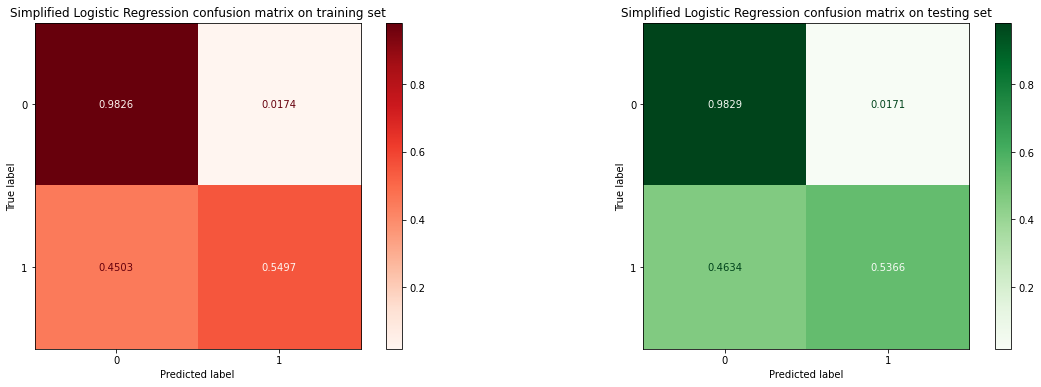

In [110]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(log_reg_simplified, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Simplified Logistic Regression confusion matrix on training set")
plot_confusion_matrix(log_reg_simplified, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Simplified Logistic Regression confusion matrix on testing set")
plt.show()

* Sur les données d'apprentissage, le modèle de régression logistique simplifié reconnaît plus de 95% des individus de la classe négative (classe 0) et près de 55% de la classe positive (classe 1).
* Sur les données de test, le modèle prédit la bonne classe d'appartenance pour plus de 95% des individus de la classe négative et près de 54% des utilisateurs de la classe positive.
* Nous obtenons à une décimale près les mêmes scores que la régression logistique réalisée sur l'ensemble des variables explicatives.

In [111]:
print("Simplified Logistic Regression : classification metrics on training set")
print(classification_report(y_train, log_reg_simplified.predict(X_train_simplified)))
print()
print("Simplified Logistic Regression : classification metrics on testing set")
print(classification_report(y_test, log_reg_simplified.predict(X_test_simplified)))

Simplified Logistic Regression : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     95872
           1       0.77      0.55      0.64      9906

    accuracy                           0.94    105778
   macro avg       0.86      0.77      0.80    105778
weighted avg       0.94      0.94      0.94    105778


Simplified Logistic Regression : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     41089
           1       0.76      0.54      0.63      4245

    accuracy                           0.94     45334
   macro avg       0.86      0.76      0.80     45334
weighted avg       0.94      0.94      0.94     45334



* Le f1-score de la classe positive est de 0.64 pour les données d'apprentissage et de 0.63 pour les données de test.
* Plus précisément, sur nos données de test, le modèle effectue un peu moins de 80% de prédictions correctes sur la classe positive, et sur tous les individus de la classe positive, il parvient à en reconnaître un peu plus de 50%.
* Ce sont les mêmes résultats que sur l'ensemble des prédicteurs.

In [112]:
log_reg_simplified_coef_ranking = pd.DataFrame(
    data=log_reg_simplified.coef_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Coefficient"])
log_reg_simplified_coef_ranking

,Coefficient
seconds_between_purchase_signup,-0.176593
purchase_day_of_year,-0.327901
signup_day_of_year,-0.409488
purchase_week_of_year,0.614413
signup_week_of_year,0.167239
purchase_month_January,3.946781
purchase_day,-0.367901
signup_day,-0.119735
signup_month_January,-0.032606


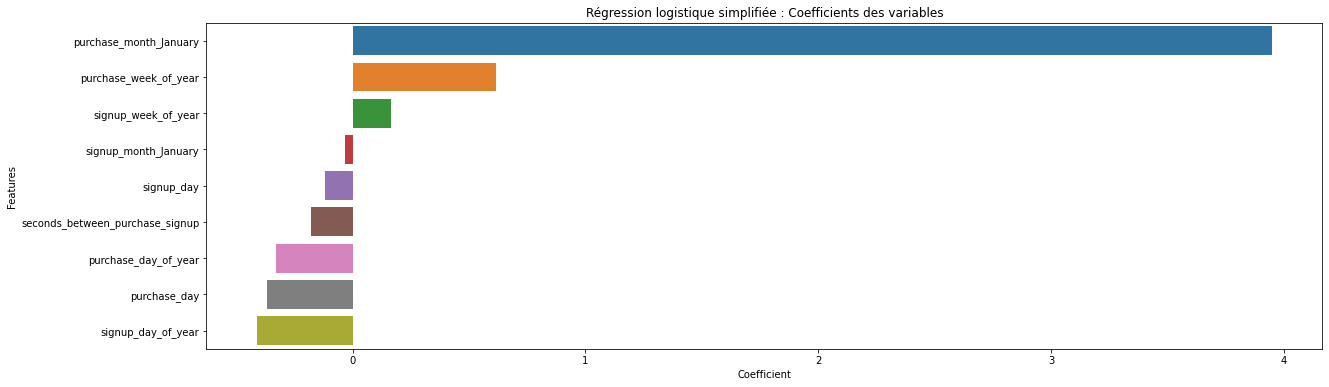

In [113]:
log_reg_simplified_coef_ranking = log_reg_simplified_coef_ranking.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(data=log_reg_simplified_coef_ranking, x="Coefficient", y=log_reg_simplified_coef_ranking.index)
plt.ylabel("Features")
plt.title("Régression logistique simplifiée : Coefficients des variables")
plt.show()

* Le coefficient le plus élevé est toujours celui du feature déclarant si la transaction s'est faite au mois de janvier.
* Les autres coefficients demeurent aussi proches de 0 que lors de la première régression logistique.

## Régression logistique

### Mode équilibré

* Un poids est assigné à chaque observation, il est inversement proportionnel à la proportion de la classe au sein de la population.

In [114]:
log_reg_balanced = LogisticRegression(class_weight='balanced')
log_reg_balanced.fit(X_train_simplified, y_train)
log_reg_balanced.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [115]:
print("Balanced Logistic Regression score on training set :", log_reg_balanced.score(X_train_simplified, y_train))
print("Balanced Logistic Regression score on testing set :", log_reg_balanced.score(X_test_simplified, y_test))

Balanced Logistic Regression score on training set : 0.9420295335514001
Balanced Logistic Regression score on testing set : 0.9411038072969515


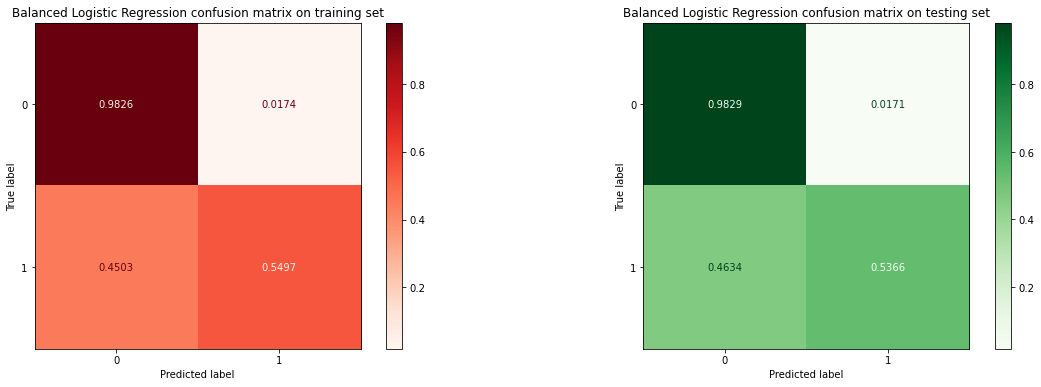

In [116]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(log_reg_balanced, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Balanced Logistic Regression confusion matrix on training set")
plot_confusion_matrix(log_reg_balanced, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Balanced Logistic Regression confusion matrix on testing set")
plt.show()

In [117]:
print("Balanced Logistic Regression : classification metrics on training set")
print(classification_report(y_train, log_reg_balanced.predict(X_train_simplified)))
print()
print("Balanced Logistic Regression : classification metrics on testing set")
print(classification_report(y_test, log_reg_balanced.predict(X_test_simplified)))

Balanced Logistic Regression : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     95872
           1       0.77      0.55      0.64      9906

    accuracy                           0.94    105778
   macro avg       0.86      0.77      0.80    105778
weighted avg       0.94      0.94      0.94    105778


Balanced Logistic Regression : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     41089
           1       0.76      0.54      0.63      4245

    accuracy                           0.94     45334
   macro avg       0.86      0.76      0.80     45334
weighted avg       0.94      0.94      0.94     45334



In [118]:
log_reg_balanced_coef_ranking = pd.DataFrame(
    data=log_reg_balanced.coef_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Coefficient"])
log_reg_balanced_coef_ranking

,Coefficient
seconds_between_purchase_signup,-0.096009
purchase_day_of_year,0.060229
signup_day_of_year,0.014140
purchase_week_of_year,0.175384
signup_week_of_year,-0.210519
purchase_month_January,4.149200
purchase_day,-0.070194
signup_day,-0.051997
signup_month_January,-0.021395


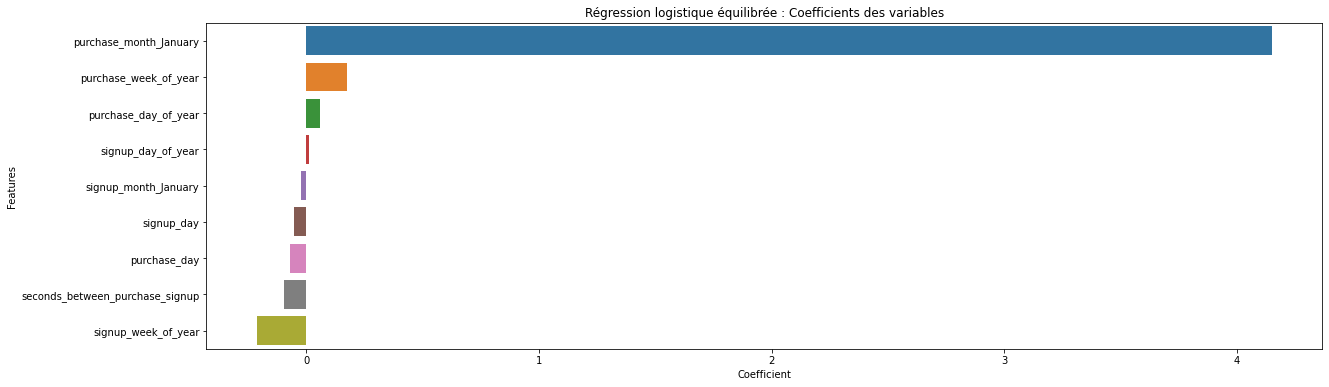

In [119]:
log_reg_balanced_coef_ranking = log_reg_balanced_coef_ranking.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(data=log_reg_balanced_coef_ranking, x="Coefficient", y=log_reg_balanced_coef_ranking.index)
plt.ylabel("Features")
plt.title("Régression logistique équilibrée : Coefficients des variables")
plt.show()

* Le coefficient le plus élevé est toujours celui du feature déclarant si la transaction s'est faite au mois de janvier.
* Les autres coefficients demeurent aussi proches de 0 que lors de la première régression logistique.

## Régression logistique

### Mode pondéré

* Une nouvelle régression logistique est lancée avec des poids définis pour chaque classe. Ces poids sont différents de ceux établis lors de la régression logistique équilibrée.

In [120]:
# poids appliqués lors du mode équilibré
y_train.size / (2 * np.bincount(y_train))

array([0.55166263, 5.33908742])

In [121]:
log_reg_weighted = LogisticRegression(class_weight={0 : 0.047, 1 : 0.953})
log_reg_weighted.fit(X_train_simplified, y_train)
log_reg_weighted.get_params()

{'C': 1.0,
 'class_weight': {0: 0.047, 1: 0.953},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [122]:
print("Weighted Logistic Regression score on training set :", log_reg_weighted.score(X_train_simplified, y_train))
print("Weighted Logistic Regression score on testing set :", log_reg_weighted.score(X_test_simplified, y_test))

Weighted Logistic Regression score on training set : 0.7064607007128136
Weighted Logistic Regression score on testing set : 0.7083645828737812


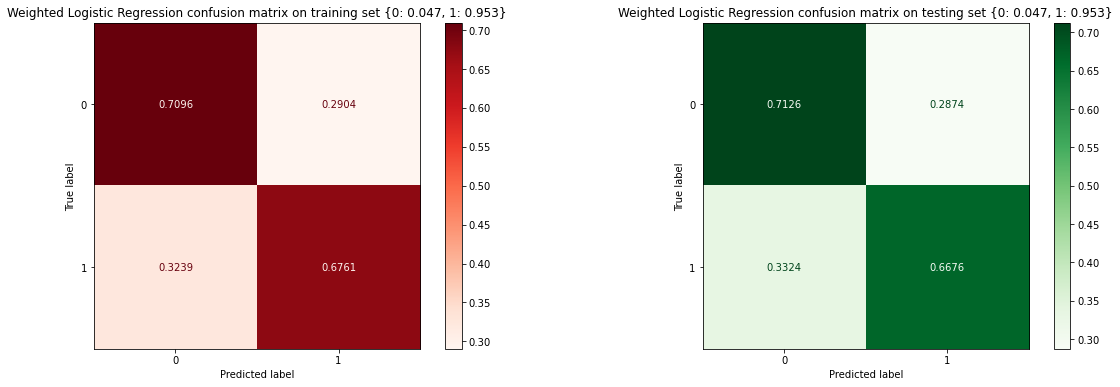

In [123]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(log_reg_weighted, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Weighted Logistic Regression confusion matrix on training set %s" % log_reg_weighted.class_weight)
plot_confusion_matrix(log_reg_weighted, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Weighted Logistic Regression confusion matrix on testing set %s" % log_reg_weighted.class_weight)
plt.show()

* Sur les données d'apprentissage, le modèle de régression logistique pondéré reconnaît près de 71% des individus de la classe négative et près de 68% de la classe positive.
* Sur les données de test, le modèle prédit la bonne classe d'appartenance pour plus de 71% des individus de la classe négative et près de 67% des utilisateurs de la classe positive.

In [124]:
print("Weighted Logistic Regression : classification metrics on training set %s" % log_reg_weighted.class_weight)
print(classification_report(y_train, log_reg_weighted.predict(X_train_simplified)))
print()
print("Weighted Logistic Regression : classification metrics on testing set %s" % log_reg_weighted.class_weight)
print(classification_report(y_test, log_reg_weighted.predict(X_test_simplified)))

Weighted Logistic Regression : classification metrics on training set {0: 0.047, 1: 0.953}
              precision    recall  f1-score   support

           0       0.95      0.71      0.81     95872
           1       0.19      0.68      0.30      9906

    accuracy                           0.71    105778
   macro avg       0.57      0.69      0.56    105778
weighted avg       0.88      0.71      0.77    105778


Weighted Logistic Regression : classification metrics on testing set {0: 0.047, 1: 0.953}
              precision    recall  f1-score   support

           0       0.95      0.71      0.82     41089
           1       0.19      0.67      0.30      4245

    accuracy                           0.71     45334
   macro avg       0.57      0.69      0.56     45334
weighted avg       0.88      0.71      0.77     45334



* Le f1-score de la classe positive est de 0.30 pour les données d'apprentissage et les données de test.
* Plus précisément, sur nos données de test, le modèle de régression logistique pondéré effectue moins de 20% de prédictions correctes sur la classe positive, et sur tous les individus de la classe positive, il parvient à en reconnaître un peu moins de 70%.

In [125]:
log_reg_weighted_coef_ranking = pd.DataFrame(
    data=log_reg_weighted.coef_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Coefficient"])
log_reg_weighted_coef_ranking

,Coefficient
seconds_between_purchase_signup,-0.050091
purchase_day_of_year,0.059117
signup_day_of_year,0.028280
purchase_week_of_year,0.076664
signup_week_of_year,-0.140174
purchase_month_January,4.119644
purchase_day,-0.041684
signup_day,-0.045158
signup_month_January,-0.004866


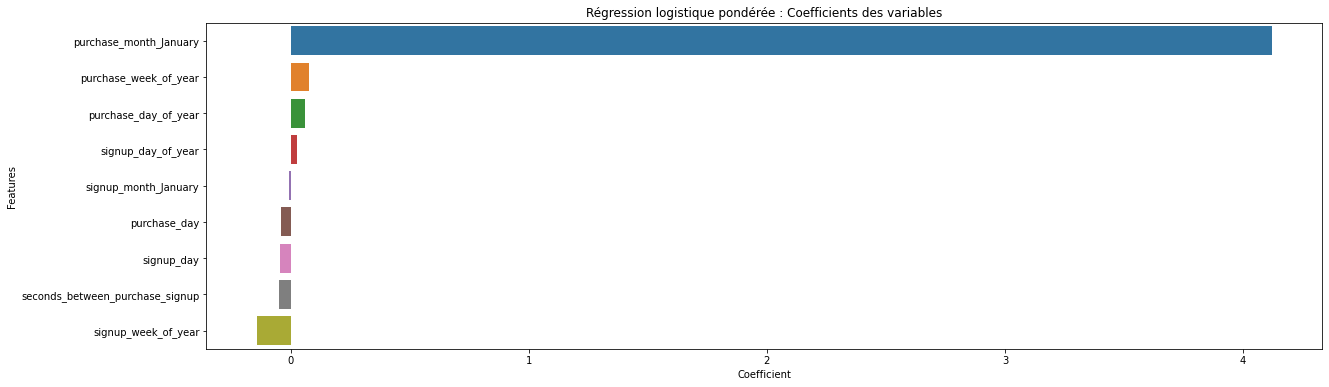

In [126]:
log_reg_weighted_coef_ranking = log_reg_weighted_coef_ranking.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(20,6))
sns.barplot(data=log_reg_weighted_coef_ranking, x="Coefficient", y=log_reg_weighted_coef_ranking.index)
plt.ylabel("Features")
plt.title("Régression logistique pondérée : Coefficients des variables")
plt.show()

* Le feature affirmant si la transaction s'est déroulée au mois de janvier possède le coefficient le plus élevé.
* Les autres variables ont des coefficients plus proches de 0 que lors des régressions logistiques précédentes. Le coefficient le plus élevé est de 0.14 en valeur absolue, il correspond à la variable indiquant la semaine où s'est faite l'inscription de l'utilisateur à l'origine de la transaction.

## Forêt aléatoire

* Observons les résultats obtenus après réalisation d'une forêt aléatoire composée de 100 arbres de décisions sur les variables les plus significatives.

In [150]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
rand_forest.fit(X_train_simplified, y_train)
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [151]:
print("Random forest score on training set :", rand_forest.score(X_train_simplified, y_train))
print("Random forest score on testing set :", rand_forest.score(X_test_simplified, y_test))

Random forest score on training set : 0.9570610145777004
Random forest score on testing set : 0.9557285922265849


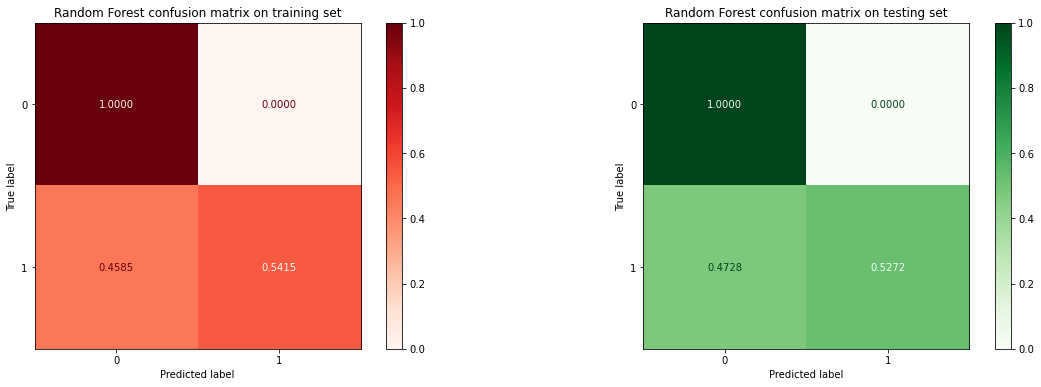

In [153]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(rand_forest, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Random Forest confusion matrix on training set")
plot_confusion_matrix(rand_forest, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Random Forest confusion matrix on testing set")
plt.show()

* Sur les données d'apprentissage, notre modèle de forêt aléatoire prédit la bonne classe pour 100% des individus de la classe négative et plus de 54% des samples de la classe positive.
* Sur les données de test, le modèle identifie correctement 100% des individus de la classe négative et près de 53% des utilisateurs de la classe positive.

In [154]:
print("Random forest : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=rand_forest.predict(X_train_simplified)))
print()
print("Random forest : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=rand_forest.predict(X_test_simplified)))

Random forest : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     95872
           1       1.00      0.54      0.70      9906

    accuracy                           0.96    105778
   macro avg       0.98      0.77      0.84    105778
weighted avg       0.96      0.96      0.95    105778


Random forest : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.69      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.76      0.83     45334
weighted avg       0.96      0.96      0.95     45334



* Nous obtenons un f1-score de 0.70 pour la classe positive sur les données d'apprentissage, et un f1-score de 0.69 sur les données de test.
* Pour être plus précis, sur nos données de test, la proportion de prédictions correctes sur la classe positive est de 100%, et sur l'ensemble des individus labellisés comme appartenant à la classe positive, le modèle reconnaît 53% d'entre eux.

In [155]:
feature_importance_rand_forest = pd.DataFrame(
    data=rand_forest.feature_importances_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Score"])
feature_importance_rand_forest

,Score
seconds_between_purchase_signup,0.472623
purchase_day_of_year,0.216932
signup_day_of_year,0.023402
purchase_week_of_year,0.176724
signup_week_of_year,0.024481
purchase_month_January,0.068099
purchase_day,0.010863
signup_day,0.004492
signup_month_January,0.002384


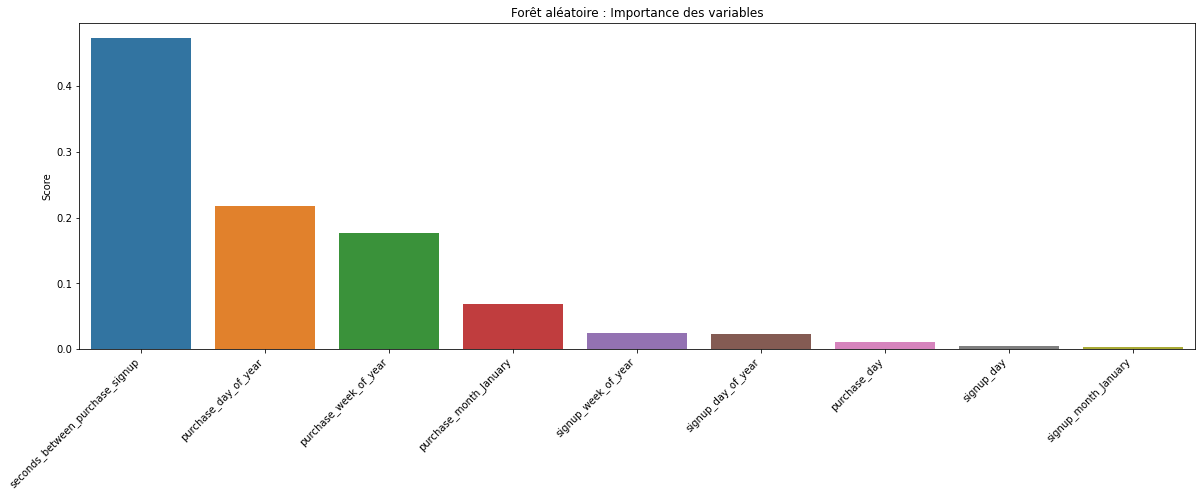

In [156]:
feature_importance_rand_forest = feature_importance_rand_forest.sort_values(by="Score", ascending=False)

plt.figure(figsize=(20,6))
plt.title("Forêt aléatoire : Importance des variables")
ax = sns.barplot(data=feature_importance_rand_forest, y="Score", x=feature_importance_rand_forest.index)
ax.set_xticklabels(feature_importance_rand_forest.index, rotation=45, ha="right")
plt.show()

* Conformément au test du Chi2 réalisé précédemment, la variable répertoriant le temps écoulé en secondes entre la création du compte et l'achat par les utilisateurs reste importante par rapport aux autres features (score supérieur à 0.4).
* Les features purchase_day_of_year et purchase_week_of_year sont aussi des variables relativement discriminantes (score autour de 0.2).
* Les autres variables tiennent des rôles légers dans la classification des transactions.

## AdaBoost

### Arbre de décision

* Appliquons à nos données un classificateur AdaBoost construit sur 100 arbres de décisions et portant toujours sur les variables les plus significatives issues du test du Chi2.

#### Profondeur maximale de 1

In [161]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(n_estimators=100)
ada_boost.fit(X_train_simplified, y_train)
ada_boost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [171]:
print("AdaBoost score on training set :", ada_boost.score(X_train_simplified, y_train))
print("AdaBoost score on testing set :", ada_boost.score(X_test_simplified, y_test))

AdaBoost score on training set : 0.9570515608160487
AdaBoost score on testing set : 0.9556624167291657


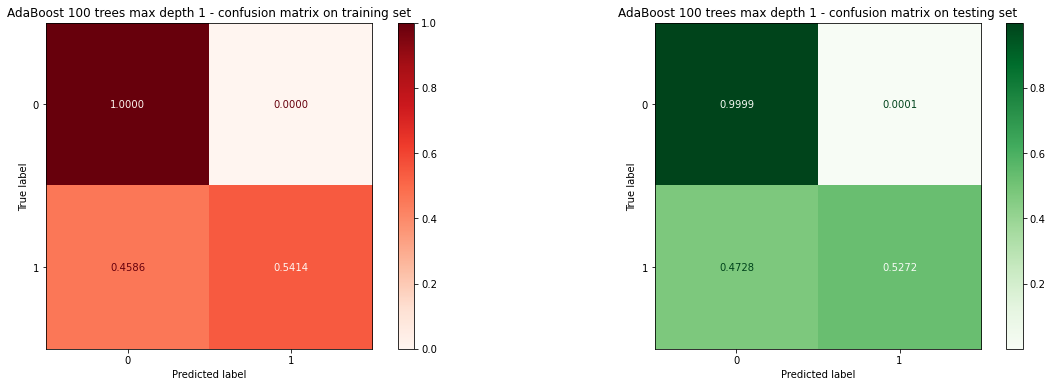

In [172]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(ada_boost, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("AdaBoost 100 trees max depth 1 - confusion matrix on training set")
plot_confusion_matrix(ada_boost, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("AdaBoost 100 trees max depth 1 - confusion matrix on testing set")
plt.show()

* Sur les données d'apprentissage, le modèle AdaBoost détecte 100% des individus de la classe négative et attribue la bonne classe pour près de 54% des samples de la classe positive.
* Sur les données de test, le modèle reconnaît 100% des individus de la classe négative et près de 53% des samples de la classe positive.

#### Profondeur maximale de 8

* Tentons de voir ce que donne l'AdaBoost sur 100 arbres de décision de profondeur maximale 8.

In [164]:
from sklearn.tree import DecisionTreeClassifier

tree_estimator = DecisionTreeClassifier(max_depth=8)
ada_boost_depth_8 = AdaBoostClassifier(base_estimator=tree_estimator, n_estimators=100)
ada_boost_depth_8.fit(X_train_simplified, y_train)
ada_boost_depth_8.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 8,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': None,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=8),
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

In [173]:
print("AdaBoost max depth 8 score on training set :", ada_boost_depth_8.score(X_train_simplified, y_train))
print("AdaBoost max depth 8 score on testing set :", ada_boost_depth_8.score(X_test_simplified, y_test))

AdaBoost max depth 8 score on training set : 0.979371892075857
AdaBoost max depth 8 score on testing set : 0.9378832664225526


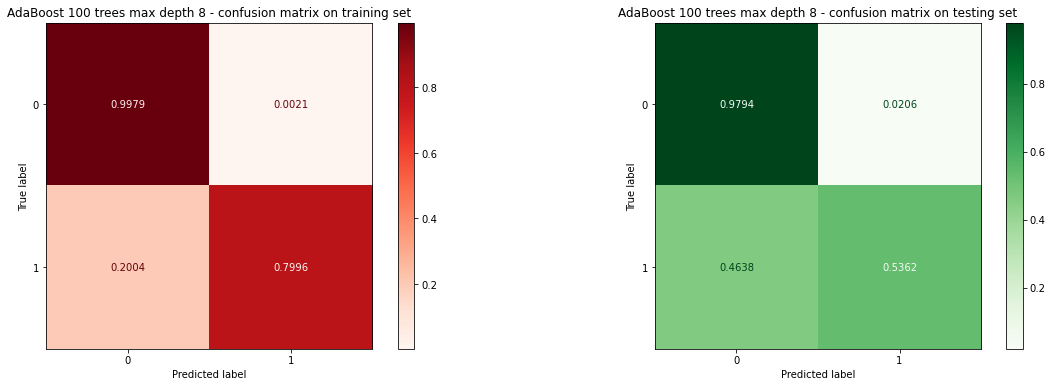

In [174]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(ada_boost_depth_8, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("AdaBoost 100 trees max depth 8 - confusion matrix on training set")
plot_confusion_matrix(ada_boost_depth_8, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("AdaBoost 100 trees max depth 8 - confusion matrix on testing set")
plt.show()

* Ce modèle AdaBoost est overfitté : certes, il reconnaît aisément les samples de la classe négative (classe majoritaire), que ce soit pour les données d'apprentissage comme pour les données de test. Cependant, il se généralise très mal concernant les individus de la classe positive : il arrive seulement à identifier près de 54% des observations des données de test alors qu'il détecte près de 80% sur les données d'apprentissage.

#### Analyses

* Analysons mieux les résultats du modèle AdaBoost de profondeur maximale 1.

In [169]:
print("AdaBoost : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=ada_boost.predict(X_train_simplified)))
print()
print("AdaBoost : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=ada_boost.predict(X_test_simplified)))

AdaBoost : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     95872
           1       1.00      0.54      0.70      9906

    accuracy                           0.96    105778
   macro avg       0.98      0.77      0.84    105778
weighted avg       0.96      0.96      0.95    105778


AdaBoost : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.69      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.76      0.83     45334
weighted avg       0.96      0.96      0.95     45334



* Nous obtenons un f1-score de 0.70 pour la classe positive sur les données d'apprentissage, et un f1-score de 0.69 sur les données de test.
* Pour être plus précis, sur nos données de test, la proportion de prédictions correctes sur la classe positive est de 100%, et sur l'ensemble des individus labellisés comme appartenant à la classe positive, le modèle reconnaît 53% d'entre eux.

In [175]:
feature_importance_ada_boost = pd.DataFrame(
    data=ada_boost.feature_importances_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Score"])
feature_importance_ada_boost

,Score
seconds_between_purchase_signup,0.510000
purchase_day_of_year,0.220000
signup_day_of_year,0.100000
purchase_week_of_year,0.010000
signup_week_of_year,0.010000
purchase_month_January,0.000000
purchase_day,0.100000
signup_day,0.050000
signup_month_January,0.000000


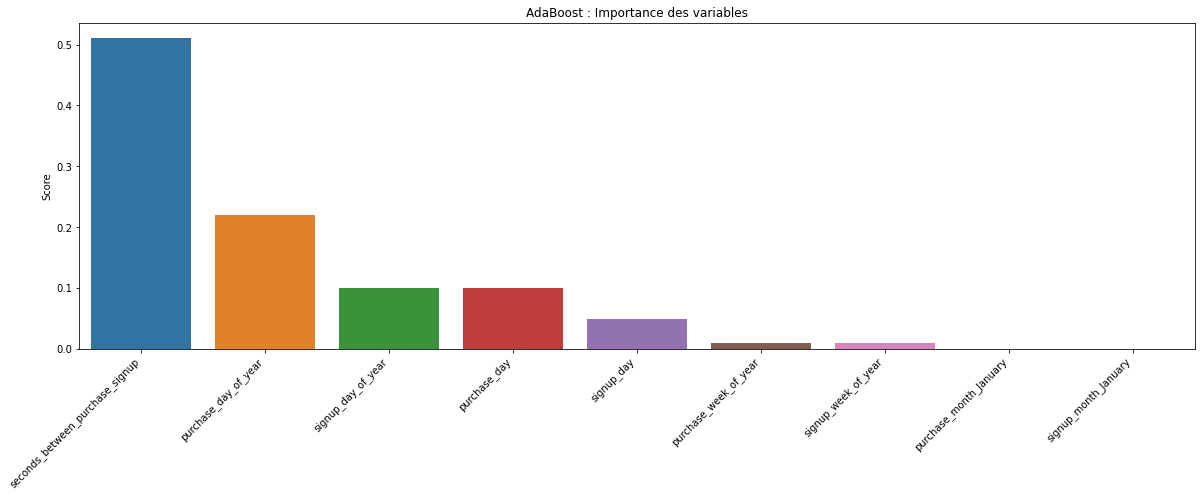

In [176]:
feature_importance_ada_boost = feature_importance_ada_boost.sort_values(by="Score", ascending=False)

plt.figure(figsize=(20,6))
plt.title("AdaBoost : Importance des variables")
ax = sns.barplot(data=feature_importance_ada_boost, y="Score", x=feature_importance_ada_boost.index)
ax.set_xticklabels(feature_importance_ada_boost.index, rotation=45, ha="right")
plt.show()

* Tout comme la forêt aléatoire, la variable répertoriant le temps écoulé en secondes entre la création du compte et l'achat par les utilisateurs reste importante par rapport aux autres features (score supérieur à 0.5).
* La deuxième variable la plus discriminante est purchase_day_of_year (score de 0.22), i.e. le feature indiquant le jour dans l'année au cours duquel l'achat s'est fait.
* Les features signup_day_of_year et purchase_day ont aussi un rôle non négligeable (score de 0.1).
* Les autres variables tiennent des rôles négligeables ou nuls.

### Régression logistique

* Modifions l'estimateur de base à partir duquel le classificateur AdaBoost est construit : nous allons utiliser la régression logistique.

In [177]:
log_reg_estimator = LogisticRegression()
ada_boost_log_reg = AdaBoostClassifier(base_estimator=log_reg_estimator, n_estimators=100)
ada_boost_log_reg.fit(X_train_simplified, y_train)
ada_boost_log_reg.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__C': 1.0,
 'base_estimator__class_weight': None,
 'base_estimator__dual': False,
 'base_estimator__fit_intercept': True,
 'base_estimator__intercept_scaling': 1,
 'base_estimator__l1_ratio': None,
 'base_estimator__max_iter': 100,
 'base_estimator__multi_class': 'auto',
 'base_estimator__n_jobs': None,
 'base_estimator__penalty': 'l2',
 'base_estimator__random_state': None,
 'base_estimator__solver': 'lbfgs',
 'base_estimator__tol': 0.0001,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': LogisticRegression(),
 'learning_rate': 1.0,
 'n_estimators': 100,
 'random_state': None}

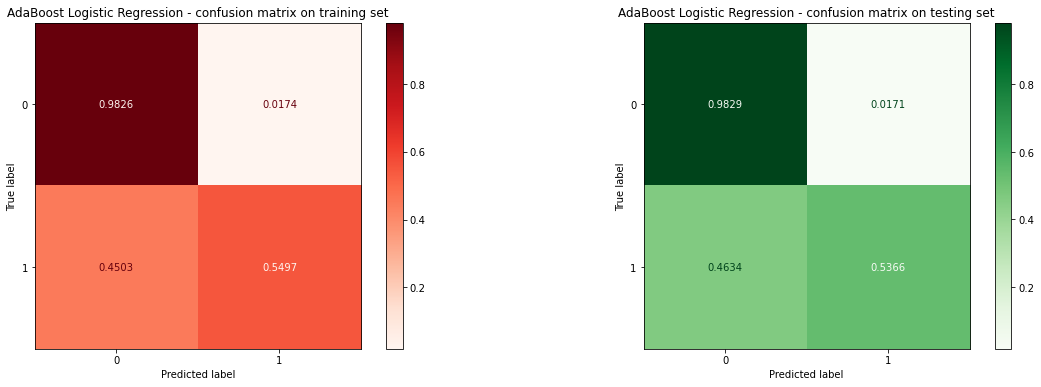

In [178]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(ada_boost_log_reg, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("AdaBoost Logistic Regression - confusion matrix on training set")
plot_confusion_matrix(ada_boost_log_reg, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("AdaBoost Logistic Regression - confusion matrix on testing set")
plt.show()

* Sur les données d'apprentissage, le modèle AdaBoost construit sur la régression logistique reconnaît plus de 98% des individus de la classe négative et prédit la bonne classe pour moins de 55% des samples de la classe positive.
* Sur les données de test, ce modèle parvient à identifier plus de 98% des individus de la classe négative et plus de 53% des samples de la classe positive.
* C'est très légérement mieux que le modèle AdaBoost à 100 arbres de décision.

In [180]:
print("AdaBoost on Logistic Regression : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=ada_boost_log_reg.predict(X_train_simplified)))
print()
print("AdaBoost on Logistic Regression : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=ada_boost_log_reg.predict(X_test_simplified)))

AdaBoost on Logistic Regression : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     95872
           1       0.77      0.55      0.64      9906

    accuracy                           0.94    105778
   macro avg       0.86      0.77      0.80    105778
weighted avg       0.94      0.94      0.94    105778


AdaBoost on Logistic Regression : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     41089
           1       0.76      0.54      0.63      4245

    accuracy                           0.94     45334
   macro avg       0.86      0.76      0.80     45334
weighted avg       0.94      0.94      0.94     45334



* Nous observons un f1-score de 0.64 pour la classe positive sur les données d'apprentissage, et un f1-score de 0.63 sur les données de test.
* Plus précisément, sur nos données de test, la proportion de prédictions correctes sur la classe positive est de 76%, et sur l'ensemble des individus apartenant à la classe positive, le modèle reconnaît 54% d'entre eux.

## XGBoost

* Analysons les résultats fournis par un classificateur XGBoost sur 100 arbres de décision.

### Profondeur maximale de 6

In [209]:
from xgboost import XGBClassifier

xg_boost = XGBClassifier()
xg_boost.fit(X_train_simplified, y_train)
xg_boost.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

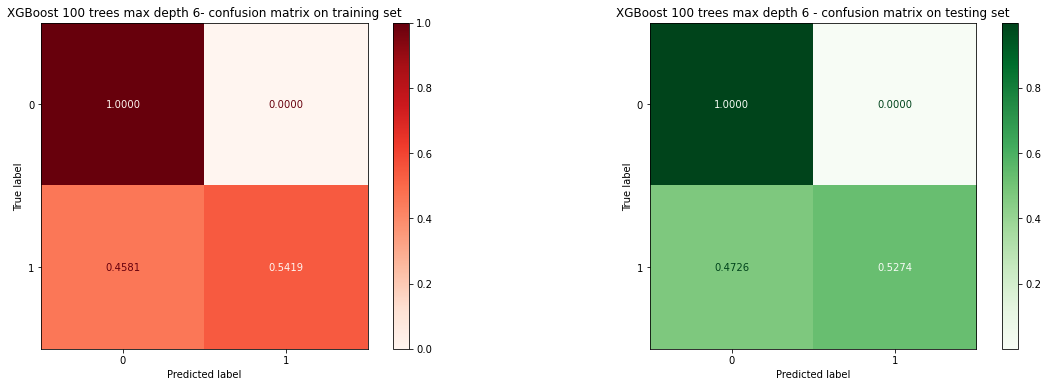

In [210]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(xg_boost, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("XGBoost 100 trees max depth 6- confusion matrix on training set")
plot_confusion_matrix(xg_boost, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("XGBoost 100 trees max depth 6 - confusion matrix on testing set")
plt.show()

* Sur les données d'apprentissage, le modèle XGBoost détecte 100% des individus de la classe négative et attribue la bonne classe pour moins de 55% des samples de la classe positive.
* Sur les données de test, le modèle reconnaît 100% des individus de la classe négative et près de 53% des transactions de la classe positive.

### Profondeur maximale de 10

* Modifions les hyperparamètres et relançons le modèle avec une profondeur maximale 10.

In [211]:
xg_boost_depth_10 = XGBClassifier(max_depth=10)
xg_boost_depth_10.fit(X_train_simplified, y_train)
xg_boost_depth_10.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

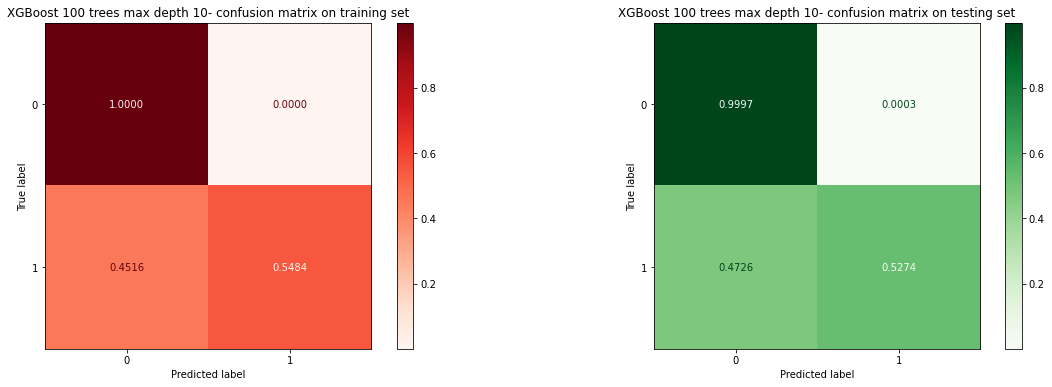

In [212]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(xg_boost_depth_10, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("XGBoost 100 trees max depth 10- confusion matrix on training set")
plot_confusion_matrix(xg_boost_depth_10, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("XGBoost 100 trees max depth 10- confusion matrix on testing set")
plt.show()

* Sur les données d'apprentissage, le modèle XGBoost construit sur 100 arbres de profondeur maximale 10 identifie 100% des individus de la classe négative. Il déclare la bonne classe pour moins de 55% des samples de la classe positive.
* Sur les données de test, le modèle reconnaît près de 100% des observations de la classe négative mais il prédit de façon correcte près de 53% des samples de la classe positive.
* Les résultats ne sont pas meilleurs que ceux issus du précédent modèle XGBoost de profondeur maximale 6. 

### Analyses

* Regardons de plus près les scores du premier modèle XGBoost.

In [216]:
print("XGBoost : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=xg_boost.predict(X_train_simplified)))
print()
print("XGBoost : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=xg_boost.predict(X_test_simplified)))

XGBoost : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     95872
           1       1.00      0.54      0.70      9906

    accuracy                           0.96    105778
   macro avg       0.98      0.77      0.84    105778
weighted avg       0.96      0.96      0.95    105778


XGBoost : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.69      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.76      0.83     45334
weighted avg       0.96      0.96      0.95     45334



* Nous obtenons un f1-score de 0.70 pour la classe positive sur les données d'apprentissage, et un f1-score de 0.69 sur les données de test.
* Pour être plus précis, sur nos données de test, la proportion de prédictions correctes sur la classe positive est de 100%, et sur l'ensemble des individus labellisés comme appartenant à la classe positive, le modèle reconnaît 53% d'entre eux.

In [217]:
feature_importance_xg_boost = pd.DataFrame(
    data=xg_boost.feature_importances_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Score"])
feature_importance_xg_boost

,Score
seconds_between_purchase_signup,0.801275
purchase_day_of_year,0.049335
signup_day_of_year,0.050079
purchase_week_of_year,0.000000
signup_week_of_year,0.000000
purchase_month_January,0.000000
purchase_day,0.050162
signup_day,0.049149
signup_month_January,0.000000


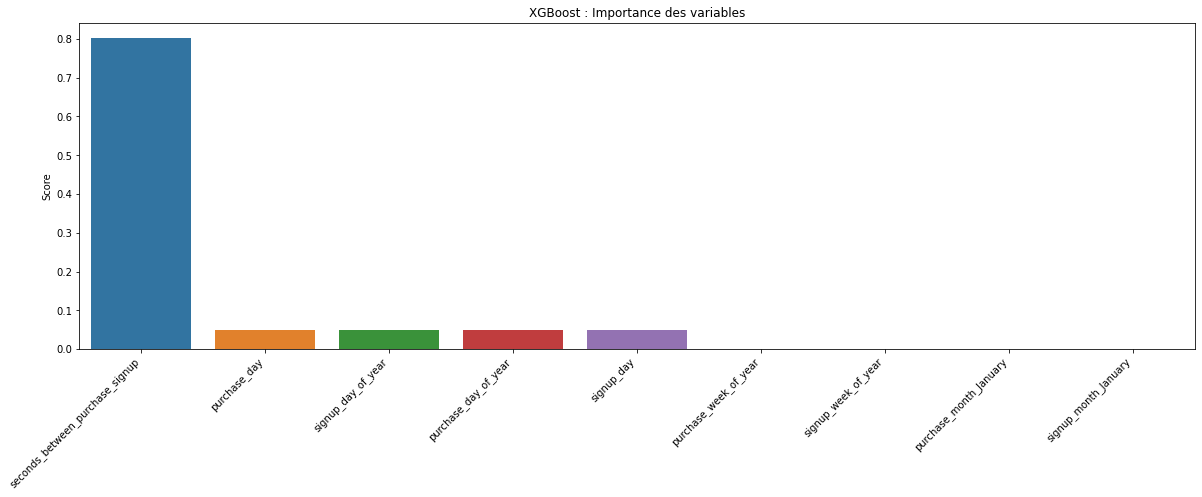

In [218]:
feature_importance_xg_boost = feature_importance_xg_boost.sort_values(by="Score", ascending=False)

plt.figure(figsize=(20,6))
plt.title("XGBoost : Importance des variables")
ax = sns.barplot(data=feature_importance_xg_boost, y="Score", x=feature_importance_xg_boost.index)
ax.set_xticklabels(feature_importance_xg_boost.index, rotation=45, ha="right")
plt.show()

* Tout comme la forêt aléatoire et le modèle AdaBoost retenu, la variable répertoriant le temps écoulé en secondes entre la création du compte et l'achat par les utilisateurs reste importante par rapport aux autres features (score supérieur à 0.8).
* Les autres variables tiennent des rôles négligeables (scores inférieurs à 0.1) ou nuls.

## Recherche des meilleurs hyperparamètres

### Régression logistique

In [234]:
from sklearn.model_selection import GridSearchCV

log_reg_estimator = LogisticRegression(max_iter=200)
params = {
    'C' : np.logspace(0, -4, num=5),
    'class_weight' : ['balanced', {0 : 0.047, 1 : 0.953}]
}

log_reg_grid = GridSearchCV(estimator=log_reg_estimator, param_grid=params, cv=4, n_jobs=-1)
log_reg_grid.fit(X_train_simplified, y_train)
log_reg_grid.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 200,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(max_iter=200),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'C': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
  'class_weight': ['balanced', {0: 0.047, 1: 0.953}]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [235]:
log_reg_grid.best_params_

{'C': 1.0, 'class_weight': 'balanced'}

* Le modèle de régression logistique optimal est celui que nous avons étudié plus haut, la régression logistique en mode équilibré.

### Forêt aléatoire

In [242]:
rand_forest_estimator = RandomForestClassifier()
params = {
    "n_estimators": [10, 25, 40, 55, 70, 90, 120],
    "max_depth" : np.arange(3, 14, 2)
}

rand_forest_grid = GridSearchCV(
    estimator = rand_forest_estimator, 
    param_grid = params, 
    n_jobs=-1,
    cv=4
)

rand_forest_grid.fit(X_train_simplified, y_train)
rand_forest_grid.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'n_estimators': [10, 25, 40, 55, 70, 90, 120],
  'max_depth': array([ 3,  5,  7,  9, 11, 13])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [243]:
rand_forest_grid.best_params_

{'max_depth': 3, 'n_estimators': 10}

* Le modèle de forêt aléatoire optimal est visiblement celui comportant 10 arbres et une profondeur maximale de 3.

In [244]:
print("Optimal Random Forest score on training set", rand_forest_grid.best_estimator_.score(X_train_simplified, y_train))
print("Optimal Random Forest score on testing set", rand_forest_grid.best_estimator_.score(X_test_simplified, y_test))

Optimal Random Forest score on training set 0.957042107054397
Optimal Random Forest score on testing set 0.9557285922265849


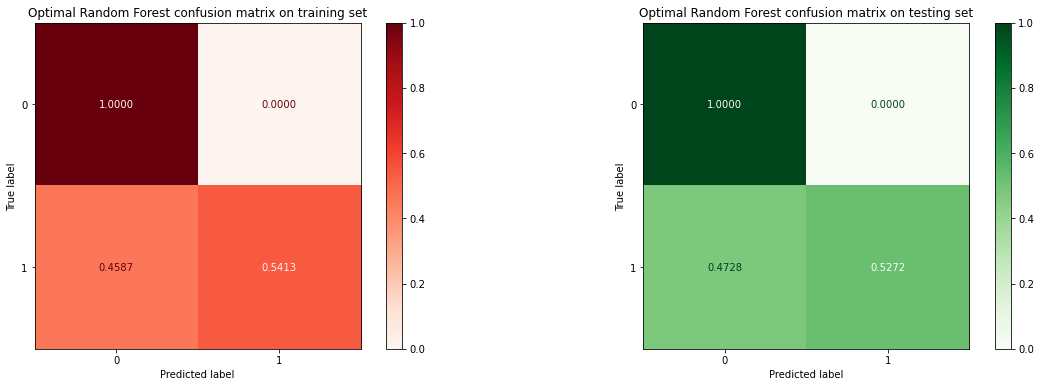

In [245]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(rand_forest_grid, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Optimal Random Forest confusion matrix on training set")
plot_confusion_matrix(rand_forest_grid, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Optimal Random Forest confusion matrix on testing set")
plt.show()

* Sur les données d'apprentissage, le modèle optimal de forêt aléatoire prédit la bonne classe pour 100% des individus de la classe négative et un peu plus de 54% des samples de la classe positive. 
* Sur les données de test, le modèle optimal identifie correctement 100% des individus de la classe négative et moins de 53% des utilisateurs de la classe positive.

In [247]:
print("Optimal Random Forest : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=rand_forest_grid.best_estimator_.predict(X_train_simplified)))
print()
print("Optimal Random Forest : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=rand_forest_grid.best_estimator_.predict(X_test_simplified)))

Optimal Random Forest : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     95872
           1       1.00      0.54      0.70      9906

    accuracy                           0.96    105778
   macro avg       0.98      0.77      0.84    105778
weighted avg       0.96      0.96      0.95    105778


Optimal Random Forest : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.69      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.76      0.83     45334
weighted avg       0.96      0.96      0.95     45334



* Tout comme pour notre modèle, le modèle optimal de forêt aléatoire affiche un f1-score de 0.70 pour la classe positive sur les données d'apprentissage, et un f1-score de 0.69 sur les données de test.
* Pour être plus précis, sur nos données de test, les prédictions correctes sur la classe positive s'élèvent à 100%, et sur l'ensemble des samples estamplillés positifs, le modèle optimal reconnaît 53% d'entre eux.

In [249]:
feature_importance_rand_forest_grid = pd.DataFrame(
    data=rand_forest_grid.best_estimator_.feature_importances_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Score"])
feature_importance_rand_forest_grid

,Score
seconds_between_purchase_signup,0.613250
purchase_day_of_year,0.100537
signup_day_of_year,0.000021
purchase_week_of_year,0.282654
signup_week_of_year,0.000018
purchase_month_January,0.000000
purchase_day,0.003476
signup_day,0.000043
signup_month_January,0.000000


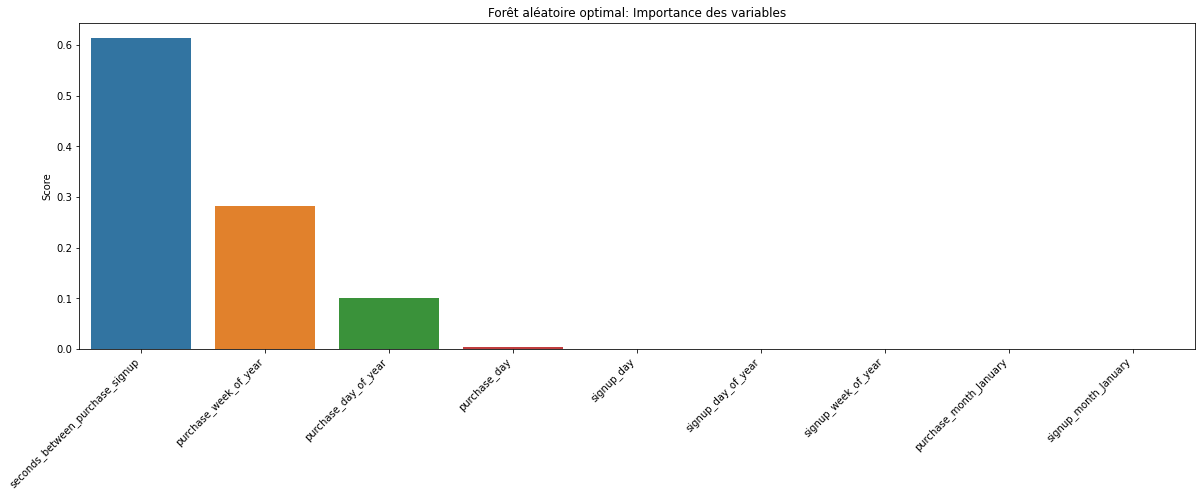

In [250]:
feature_importance_rand_forest_grid = feature_importance_rand_forest_grid.sort_values(by="Score", ascending=False)

plt.figure(figsize=(20,6))
plt.title("Forêt aléatoire optimal: Importance des variables")
ax = sns.barplot(data=feature_importance_rand_forest_grid, y="Score", x=feature_importance_rand_forest_grid.index)
ax.set_xticklabels(feature_importance_rand_forest_grid.index, rotation=45, ha="right")
plt.show()

* La variable __seconds_between_purchase_signup__ a toujours ce rôle prépondérant que nous avions repéré auparavant (score supérieur à 0.6).
* Deux autres variables ont une importance moindre mais non négligeable :
    - purchase_week_of_year, la semaine dans l'année au cours de laquelle l'achat eut lieu, a un score légérement inférieur à 0.3, 
    - purchase_day_of_year, le jour dans l'année durant lequel l'achat eut lieu, a un score de 0.1.
* Les autres variables ont un rôle infimement négligeable (score inférieur à 0.005) ou nul.

### Adaboost

In [251]:
ada_boost_estimator = AdaBoostClassifier()
params = {
    'n_estimators' : [10, 25, 40, 55, 70, 90, 110],
    'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
}

ada_boost_grid = GridSearchCV(
    estimator=ada_boost_estimator, 
    param_grid=params,
    n_jobs=-1,
    cv=4
)

ada_boost_grid.fit(X_train_simplified, y_train)
ada_boost_grid.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator__algorithm': 'SAMME.R',
 'estimator__base_estimator': None,
 'estimator__learning_rate': 1.0,
 'estimator__n_estimators': 50,
 'estimator__random_state': None,
 'estimator': AdaBoostClassifier(),
 'iid': 'deprecated',
 'n_jobs': -1,
 'param_grid': {'n_estimators': [10, 25, 40, 55, 70, 90, 110],
  'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [252]:
ada_boost_grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 10}

* Le modèle AdaBoost optimal est apparemment celui construit sur 10 arbres et doté d'un taux d'apprentissage de 1.

In [254]:
print("Optimal AdaBoost model score on training set", ada_boost_grid.best_estimator_.score(X_train_simplified, y_train))
print("Optimal AdaBoost model score on testing set", ada_boost_grid.best_estimator_.score(X_test_simplified, y_test))

Optimal AdaBoost model score on training set 0.957042107054397
Optimal AdaBoost model score on testing set 0.9557285922265849


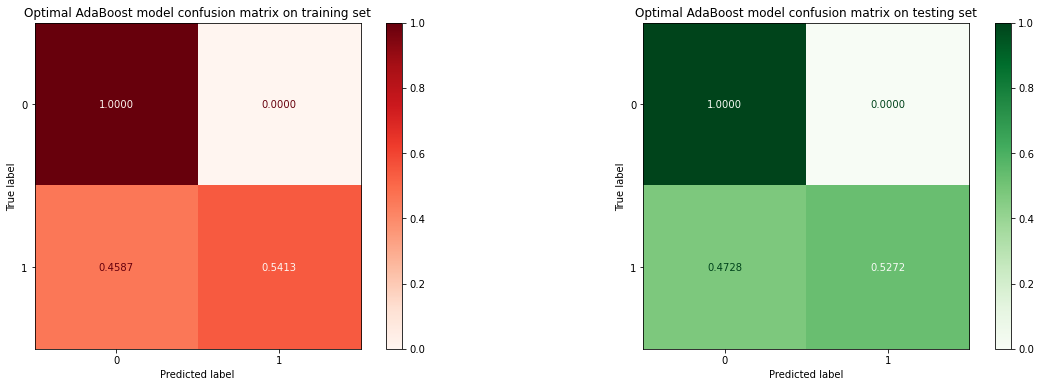

In [255]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(ada_boost_grid, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Optimal AdaBoost model confusion matrix on training set")
plot_confusion_matrix(ada_boost_grid, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Optimal AdaBoost model confusion matrix on testing set")
plt.show()

* Nous obtenons exactement les mêmes résultats que ceux donnés par la forêt aléatoire optimale.

In [256]:
print("Optimal AdaBoost model : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=ada_boost_grid.best_estimator_.predict(X_train_simplified)))
print()
print("Optimal AdaBoost model : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=ada_boost_grid.best_estimator_.predict(X_test_simplified)))

Optimal AdaBoost model : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     95872
           1       1.00      0.54      0.70      9906

    accuracy                           0.96    105778
   macro avg       0.98      0.77      0.84    105778
weighted avg       0.96      0.96      0.95    105778


Optimal AdaBoost model : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.69      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.76      0.83     45334
weighted avg       0.96      0.96      0.95     45334



In [257]:
feature_importance_adaboost_grid = pd.DataFrame(
    data=ada_boost_grid.best_estimator_.feature_importances_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Score"])
feature_importance_adaboost_grid

,Score
seconds_between_purchase_signup,0.300000
purchase_day_of_year,0.400000
signup_day_of_year,0.100000
purchase_week_of_year,0.000000
signup_week_of_year,0.000000
purchase_month_January,0.000000
purchase_day,0.100000
signup_day,0.100000
signup_month_January,0.000000


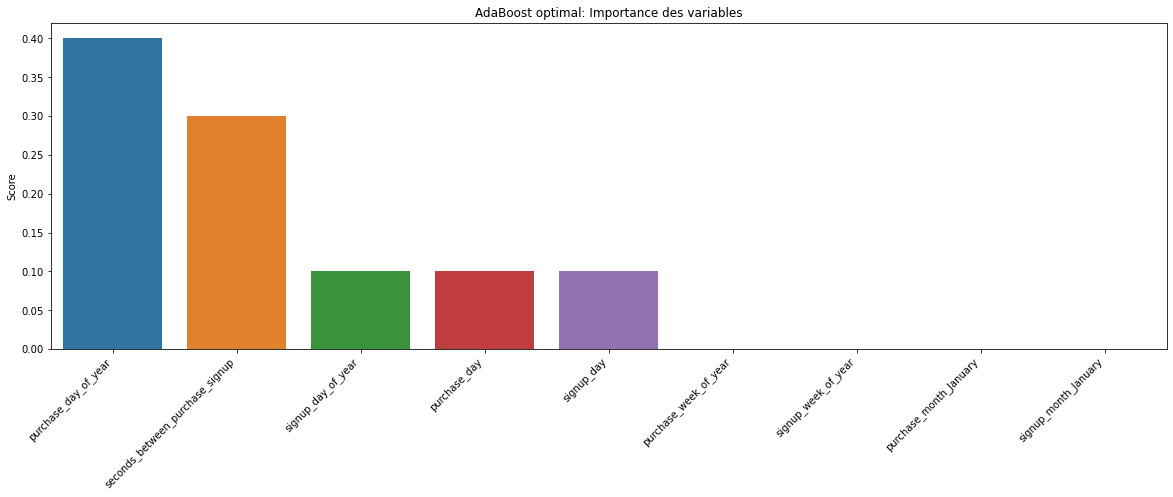

In [258]:
feature_importance_adaboost_grid = feature_importance_adaboost_grid.sort_values(by="Score", ascending=False)

plt.figure(figsize=(20,6))
plt.title("AdaBoost optimal: Importance des variables")
ax = sns.barplot(data=feature_importance_adaboost_grid, y="Score", x=feature_importance_adaboost_grid.index)
ax.set_xticklabels(feature_importance_adaboost_grid.index, rotation=45, ha="right")
plt.show()

* La variable __seconds_between_purchase_signup__ tient une importance forte (0.30) comme dans le cas de la forêt optimale.
* Cependant, la variable la plus discriminante est le feature __purchase_day_of_year__ avec un score de 0.4. Cette variable avait un certain rôle dans les modèles précédents, mais pas aussi grand.
* Les autres variables qui ressortent ont toutes un même score (0.10), il s'agit de : 
    - signup_day_of_year
    - purchase_day
    - signup_day
* Tous les autres features ont un score nul : ils n'ont aucune valeur discriminante.

### XGBoost

In [259]:
xg_boost_estimator = XGBClassifier()
params = {
    'n_estimators' : [10, 25, 40, 55, 70, 90, 110],
    'learning_rate': [1.0, 0.9, 0.8, 0.7, 0.6, 0.5]
}

xg_boost_grid = GridSearchCV(
    estimator=xg_boost_estimator, 
    param_grid=params,
    n_jobs=-1,
    cv=4
)

xg_boost_grid.fit(X_train_simplified, y_train)
xg_boost_grid.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator__objective': 'binary:logistic',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__importance_type': 'gain',
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__random_state': None,
 'estimator__reg_alpha': None,
 'estimator__reg_lambda': None,
 'estimator__scale_pos_weight': None,
 'estimator__subsample': None,
 'estimator__tree_method': None,
 'estimator__validate_parameters': None,
 'estimator__verbosity': None,
 'estimator': XGBClassifier(b

In [260]:
xg_boost_grid.best_params_

{'learning_rate': 0.7, 'n_estimators': 10}

* Le modèle XGBoost optimal s'avère être celui élaboré sur 10 arbres et doté d'un taux d'apprentissage de 0.7.

In [261]:
print("Optimal XGBoost model score on training set", xg_boost_grid.best_estimator_.score(X_train_simplified, y_train))
print("Optimal XGBoost model score on testing set", xg_boost_grid.best_estimator_.score(X_test_simplified, y_test))

Optimal XGBoost model score on training set 0.9570610145777004
Optimal XGBoost model score on testing set 0.9557285922265849


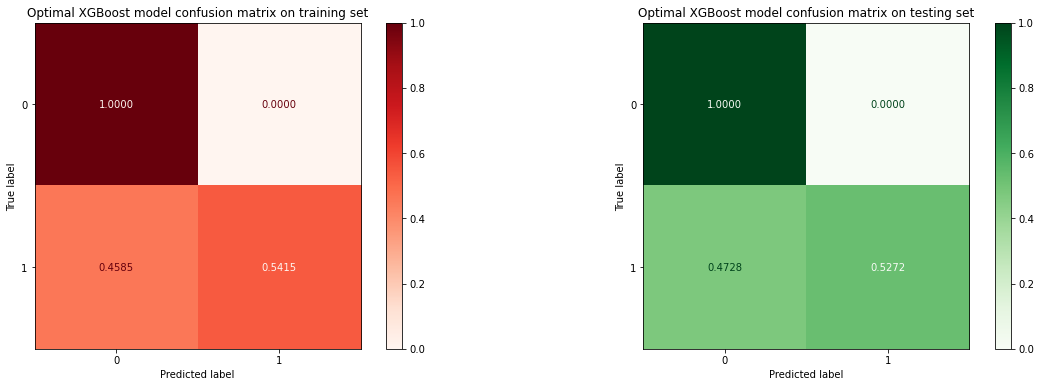

In [262]:
fig, axs = plt.subplots(figsize=(20,6), nrows=1, ncols=2)
plot_confusion_matrix(xg_boost_grid, X_train_simplified, y_train, ax=axs[0], normalize='true', values_format='.4f', cmap=plt.cm.Reds)
axs[0].set_title("Optimal XGBoost model confusion matrix on training set")
plot_confusion_matrix(xg_boost_grid, X_test_simplified, y_test, ax=axs[1], normalize='true', values_format='.4f', cmap=plt.cm.Greens)
axs[1].set_title("Optimal XGBoost model confusion matrix on testing set")
plt.show()

* Ce sont les mêmes résultats que ceux donnés par la forêt optimale et le modèle AdaBoost.

In [263]:
print("Optimal XGBoost model : classification metrics on training set")
print(classification_report(y_true=y_train, y_pred=xg_boost_grid.best_estimator_.predict(X_train_simplified)))
print()
print("Optimal XGBoost model : classification metrics on testing set")
print(classification_report(y_true=y_test, y_pred=xg_boost_grid.best_estimator_.predict(X_test_simplified)))

Optimal XGBoost model : classification metrics on training set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     95872
           1       1.00      0.54      0.70      9906

    accuracy                           0.96    105778
   macro avg       0.98      0.77      0.84    105778
weighted avg       0.96      0.96      0.95    105778


Optimal XGBoost model : classification metrics on testing set
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     41089
           1       1.00      0.53      0.69      4245

    accuracy                           0.96     45334
   macro avg       0.98      0.76      0.83     45334
weighted avg       0.96      0.96      0.95     45334



In [264]:
feature_importance_xgboost_grid = pd.DataFrame(
    data=xg_boost_grid.best_estimator_.feature_importances_.reshape(-1, 1),
    index=X_train_simplified.columns, 
    columns=["Score"])
feature_importance_xgboost_grid

,Score
seconds_between_purchase_signup,0.963689
purchase_day_of_year,0.009846
signup_day_of_year,0.008673
purchase_week_of_year,0.000000
signup_week_of_year,0.000000
purchase_month_January,0.000000
purchase_day,0.009208
signup_day,0.008584
signup_month_January,0.000000


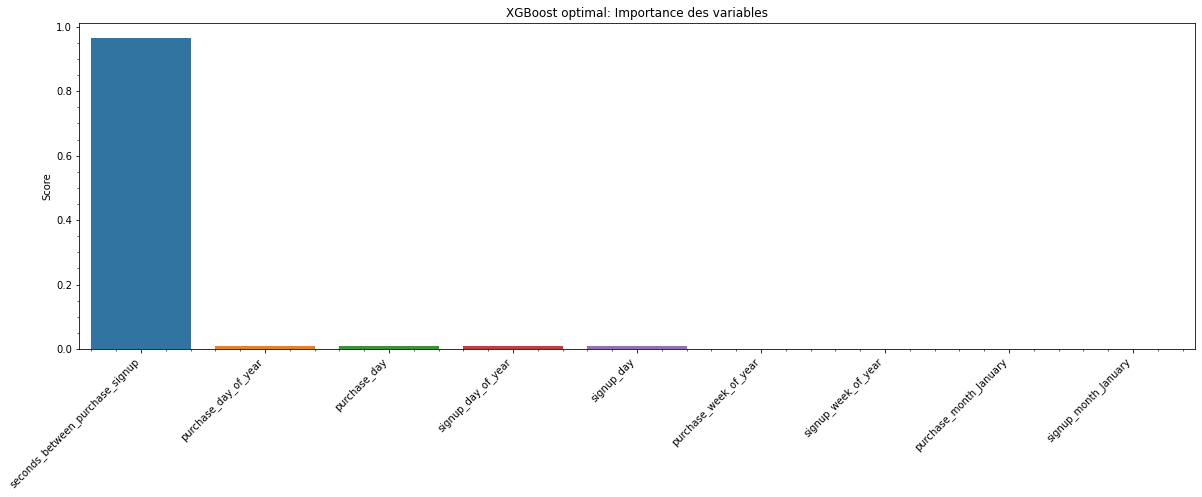

In [265]:
feature_importance_xgboost_grid = feature_importance_xgboost_grid.sort_values(by="Score", ascending=False)

plt.figure(figsize=(20,6))
plt.title("XGBoost optimal: Importance des variables")
ax = sns.barplot(data=feature_importance_xgboost_grid, y="Score", x=feature_importance_xgboost_grid.index)
ax.set_xticklabels(feature_importance_xgboost_grid.index, rotation=45, ha="right")
ax.minorticks_on()
plt.show()

* La variable __seconds_between_purchase_signup__ affiche un score extrêmement fort (plus de 0.95) : il s'agit du score le plus élevé tous modèles confondus (hormis les régressions logistiques).
* Les autres variables qui ressortent tiennent un rôle infime (scores inférieurs à 0.01), il s'agit de : 
    - purchase_day_of_year
    - purchase_day
    - signup_day_of_year
    - signup_day
* Les autres features ont un score nul : ils n'ont aucune valeur discriminante.

## Comparaison entre les modèles

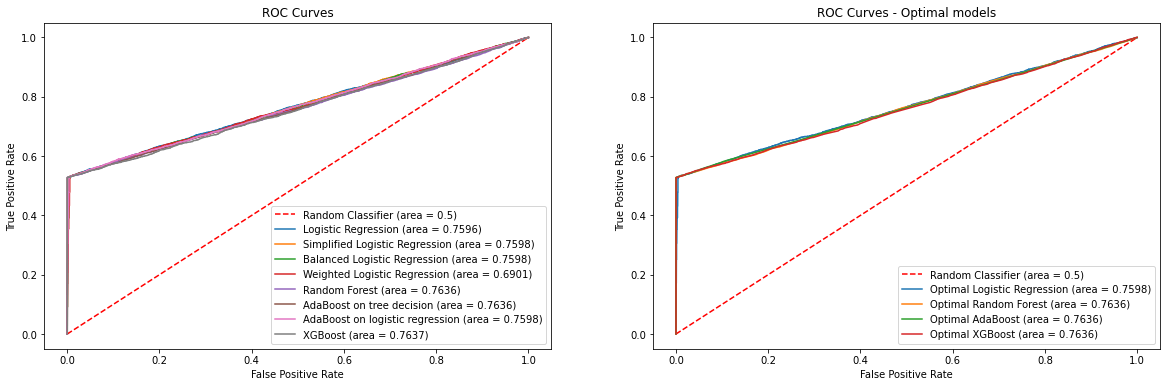

In [268]:
from sklearn.metrics import roc_auc_score, roc_curve

# Régression logistique
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

# Régression logistique simplifiée
log_reg_simplified_roc_auc = roc_auc_score(y_test, log_reg_simplified.predict(X_test_simplified))
fpr_log_reg_simplified, tpr_log_reg_simplified, _ = roc_curve(y_test, log_reg_simplified.predict_proba(X_test_simplified)[:,1])

# Régression logistique équilibrée
log_reg_balanced_roc_auc = roc_auc_score(y_test, log_reg_balanced.predict(X_test_simplified))
fpr_log_reg_balanced, tpr_log_reg_balanced, _ = roc_curve(y_test, log_reg_balanced.predict_proba(X_test_simplified)[:,1])

# Régression logistique pondérée
log_reg_weighted_roc_auc = roc_auc_score(y_test, log_reg_weighted.predict(X_test_simplified))
fpr_log_reg_weighted, tpr_log_reg_weighted, _ = roc_curve(y_test, log_reg_weighted.predict_proba(X_test_simplified)[:,1])

# Régression logistique optimale
log_reg_grid_roc_auc = roc_auc_score(y_test, log_reg_grid.predict(X_test_simplified))
fpr_log_reg_grid, tpr_log_reg_grid, _ = roc_curve(y_test, log_reg_grid.predict_proba(X_test_simplified)[:,1])

# Forêt aléatoire
rand_forest_roc_auc = roc_auc_score(y_test, rand_forest.predict(X_test_simplified))
fpr_rand_forest, tpr_rand_forest, _ = roc_curve(y_test, rand_forest.predict_proba(X_test_simplified)[:,1])

# Forêt aléatoire optimal
rand_forest_grid_roc_auc = roc_auc_score(y_test, rand_forest_grid.predict(X_test_simplified))
fpr_rand_forest_grid, tpr_rand_forest_grid, _ = roc_curve(y_test, rand_forest_grid.predict_proba(X_test_simplified)[:,1])

# AdaBoost - Arbre de décision
ada_boost_roc_auc = roc_auc_score(y_test, ada_boost.predict(X_test_simplified))
fpr_ada_boost, tpr_ada_boost, _ = roc_curve(y_test, ada_boost.predict_proba(X_test_simplified)[:,1])

# AdaBoost - Régression logistique
ada_boost_log_reg_roc_auc = roc_auc_score(y_test, ada_boost_log_reg.predict(X_test_simplified))
fpr_ada_boost_log_reg, tpr_ada_boost_log_reg, _ = roc_curve(y_test, ada_boost_log_reg.predict_proba(X_test_simplified)[:,1])

# AdaBoost optimal
ada_boost_grid_roc_auc = roc_auc_score(y_test, ada_boost_grid.predict(X_test_simplified))
fpr_ada_boost_grid, tpr_ada_boost_grid, _ = roc_curve(y_test, ada_boost_grid.predict_proba(X_test_simplified)[:,1])

# XGBoost
xg_boost_roc_auc = roc_auc_score(y_test, xg_boost.predict(X_test_simplified))
fpr_xg_boost, tpr_xg_boost, _ = roc_curve(y_test, xg_boost.predict_proba(X_test_simplified)[:,1])

# XGBoost optimal
xg_boost_grid_roc_auc = roc_auc_score(y_test, xg_boost_grid.predict(X_test_simplified))
fpr_xg_boost_grid, tpr_xg_boost_grid, _ = roc_curve(y_test, xg_boost_grid.predict_proba(X_test_simplified)[:,1])

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.title('ROC Curves')
plt.plot([0, 1], [0, 1],'r--', label="Random Classifier (area = 0.5)")

plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (area = %0.4f)' % log_reg_roc_auc)
plt.plot(fpr_log_reg_simplified, tpr_log_reg_simplified, label='Simplified Logistic Regression (area = %0.4f)' % log_reg_simplified_roc_auc)
plt.plot(fpr_log_reg_balanced, tpr_log_reg_balanced, label='Balanced Logistic Regression (area = %0.4f)' % log_reg_balanced_roc_auc)
plt.plot(fpr_log_reg_weighted, tpr_log_reg_weighted, label='Weighted Logistic Regression (area = %0.4f)' % log_reg_weighted_roc_auc)

plt.plot(fpr_rand_forest, tpr_rand_forest, label='Random Forest (area = %0.4f)' % rand_forest_roc_auc)

plt.plot(fpr_ada_boost, tpr_ada_boost, label='AdaBoost on tree decision (area = %0.4f)' % ada_boost_roc_auc)
plt.plot(fpr_ada_boost_log_reg, tpr_ada_boost_log_reg, label='AdaBoost on logistic regression (area = %0.4f)' % ada_boost_log_reg_roc_auc)

plt.plot(fpr_xg_boost, tpr_xg_boost, label='XGBoost (area = %0.4f)' % xg_boost_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.subplot(122)
plt.title('ROC Curves - Optimal models')
plt.plot([0, 1], [0, 1],'r--', label="Random Classifier (area = 0.5)")

plt.plot(fpr_log_reg_grid, tpr_log_reg_grid, label='Optimal Logistic Regression (area = %0.4f)' % log_reg_grid_roc_auc)
plt.plot(fpr_rand_forest_grid, tpr_rand_forest_grid, label='Optimal Random Forest (area = %0.4f)' % rand_forest_grid_roc_auc)
plt.plot(fpr_ada_boost_grid, tpr_ada_boost_grid, label='Optimal AdaBoost (area = %0.4f)' % ada_boost_grid_roc_auc)
plt.plot(fpr_xg_boost_grid, tpr_xg_boost_grid, label='Optimal XGBoost (area = %0.4f)' % xg_boost_grid_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

plt.show()

In [269]:
from sklearn.metrics import recall_score, precision_score

model_comparison = pd.DataFrame(index=[
    "Logistic Regression", 
    "Simplified Logistic Regression",
    "Balanced Logistic Regression",
    "Weighted Logistic Regression",
    "Optimal Logistic Regression",
    "Random Forest",
    "Optimal Random Forest",
    "AdaBoost on tree decision", 
    "AdaBoost on logistic regression",
    "Optimal AdaBoost",
    "XGBoost",
    "Optimal XGBoost"
])
model_comparison["Score"] = [
    log_reg.score(X_test, y_test), 
    log_reg_simplified.score(X_test_simplified, y_test), 
    log_reg_balanced.score(X_test_simplified, y_test),  
    log_reg_weighted.score(X_test_simplified, y_test),
    log_reg_grid.score(X_test_simplified, y_test),
    rand_forest.score(X_test_simplified, y_test), 
    rand_forest_grid.score(X_test_simplified, y_test), 
    ada_boost.score(X_test_simplified, y_test),
    ada_boost_log_reg.score(X_test_simplified, y_test),
    ada_boost_grid.score(X_test_simplified, y_test),
    xg_boost.score(X_test_simplified, y_test), 
    xg_boost_grid.score(X_test_simplified, y_test)
]
model_comparison["Precision"] = [
    precision_score(y_test, log_reg.predict(X_test)),
    precision_score(y_test, log_reg_simplified.predict(X_test_simplified)),
    precision_score(y_test, log_reg_balanced.predict(X_test_simplified)),
    precision_score(y_test, log_reg_weighted.predict(X_test_simplified)),
    precision_score(y_test, log_reg_grid.predict(X_test_simplified)),
    precision_score(y_test, rand_forest.predict(X_test_simplified)),
    precision_score(y_test, rand_forest_grid.predict(X_test_simplified)),
    precision_score(y_test, ada_boost.predict(X_test_simplified)),
    precision_score(y_test, ada_boost_log_reg.predict(X_test_simplified)),
    precision_score(y_test, ada_boost_grid.predict(X_test_simplified)),
    precision_score(y_test, xg_boost.predict(X_test_simplified)),
    precision_score(y_test, xg_boost_grid.predict(X_test_simplified))
]
model_comparison["Recall"] = [
    recall_score(y_test, log_reg.predict(X_test)),
    recall_score(y_test, log_reg_simplified.predict(X_test_simplified)),
    recall_score(y_test, log_reg_balanced.predict(X_test_simplified)),
    recall_score(y_test, log_reg_weighted.predict(X_test_simplified)),
    recall_score(y_test, log_reg_grid.predict(X_test_simplified)),
    recall_score(y_test, rand_forest.predict(X_test_simplified)),
    recall_score(y_test, rand_forest_grid.predict(X_test_simplified)),
    recall_score(y_test, ada_boost.predict(X_test_simplified)),
    recall_score(y_test, ada_boost_log_reg.predict(X_test_simplified)),
    recall_score(y_test, ada_boost_grid.predict(X_test_simplified)),
    recall_score(y_test, xg_boost.predict(X_test_simplified)),
    recall_score(y_test, xg_boost_grid.predict(X_test_simplified))
]

In [270]:
model_comparison

,Score,Precision,Recall
Logistic Regression,0.941258,0.766330,0.536160
Simplified Logistic Regression,0.941126,0.764430,0.536631
Balanced Logistic Regression,0.941104,0.764173,0.536631
Weighted Logistic Regression,0.708365,0.193526,0.667609
Optimal Logistic Regression,0.941104,0.764173,0.536631
Random Forest,0.955729,1.000000,0.527208
Optimal Random Forest,0.955729,1.000000,0.527208
AdaBoost on tree decision,0.955662,0.998661,0.527208
AdaBoost on logistic regression,0.941104,0.764173,0.536631
Optimal AdaBoost,0.955729,1.000000,0.527208


# Conclusion

* Nous avons tenté de construire un modèle permettant de réduire au maximum l'erreur de type II, à savoir le taux de faux négatifs, ou le nombre de transactions frauduleuses que le modèle déclare légales.
* Au vu du tableau de comparaison et des courbes ROC, nous n'avons pas été en mesure de fournir un modèle répondant de manière satisfaisante à la problématique posé. En effet, le recall des différents modèles construits n'excède pas 55%, cela signifie que sur toutes les transactions frauduleuses de notre jeu de données, les modèles ne parviennent à reconnaître que la moitié d'entre elles. Concernant le modèle de régression logistique pondéré, il affiche un recall de 0.67 mais sa précision est inférieure à 20%.
* Toutefois, nous pouvons dire qu'il serait judicieux de vérifier les transactions opérées dans un laps de temps très court après la création du compte. En effet, dans la partie DataViz, nous avions vu que plus de la moitié (53%) des transactions illégales de notre échantillon s'étaient réalisées moins de une seconde après inscription.
* Pour aller plus loin et pour pouvoir élaborer des modèles dotés de forts taux de prédictions correctes, il est nécessaire de collecter plus de données. Ces données doivent : 
    - sétaler sur une plus longue période ; dans notre étude, les données concernaient les transactions effectuées sur l'année 2015
    - réunir plus de features ; les informations recueillies sur les utilisateurs opérant les transactions (genre, âge, navigateur internet, adresse ip,...) ne sont pas suffisantes pour établir des profils d'utilisateurs à risque.